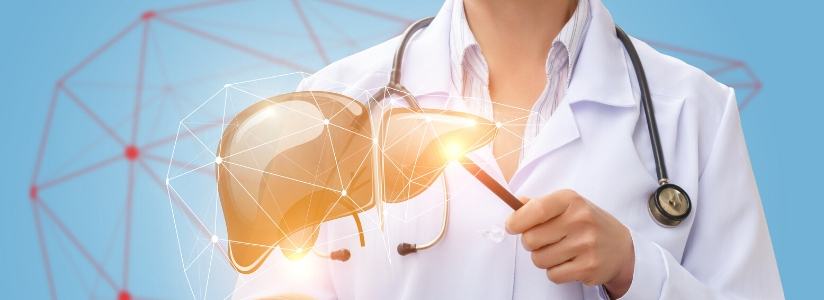

---

# Revolutionizing Liver Care Predicting Liver Cirrhosis using Advance Machine Learning Teachnique

---



#libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Data loading

### Subtask:
Load the two datasets, "cirrhosis.csv" and "Main_data.csv", into pandas DataFrames.


**Reasoning**:
Load the two datasets into pandas DataFrames.



In [27]:
try:
    df_cirrhosis = pd.read_csv('cirrhosis.csv')
    df_main = pd.read_csv('Main_data.csv')
    display(df_cirrhosis.head())
    display(df_main.head())
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
except pd.errors.ParserError:
    print("Error: There was an issue parsing one or both of the CSV files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  ...  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  SGPT  \
0     Y  ...        261.0     2.60   156.0    1718.0  137.95    16   
1     N  ...        302.0     4.14    54.0    7394.8  113.52    64   
2     S  ...        176.0     3.48   210.0     516.0   96.10    60   
3     S  ...        244.0     2.54    64.0    6121.8   60.63    14   
4     N  ...        279.0     3.53   143.0     671.0  113.15    27   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0  

[5 rows x 22 columns]

## Data exploration

### Subtask:
Explore the "cirrhosis.csv" and "Main_data.csv" datasets.


In [28]:
# 1. Examine Data Structures
print("Shape of df_cirrhosis:", df_cirrhosis.shape)


Shape of df_cirrhosis: (418, 20)


In [29]:
print("Data types of df_cirrhosis:\n", df_cirrhosis.dtypes)

Data types of df_cirrhosis:
 ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [30]:
print("\nShape of df_main:", df_main.shape)


Shape of df_main: (418, 22)


In [31]:
print("Data types of df_main:\n", df_main.dtypes)

Data types of df_main:
 ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
TB               float64
DB               float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
SGPT               int64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [32]:
# 2. Missing Value Analysis
print("\nMissing values in df_cirrhosis:")
missing_cirrhosis = df_cirrhosis.isnull().sum()
missing_percentage_cirrhosis = (missing_cirrhosis / len(df_cirrhosis)) * 100
print(missing_percentage_cirrhosis)


Missing values in df_cirrhosis:
ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64


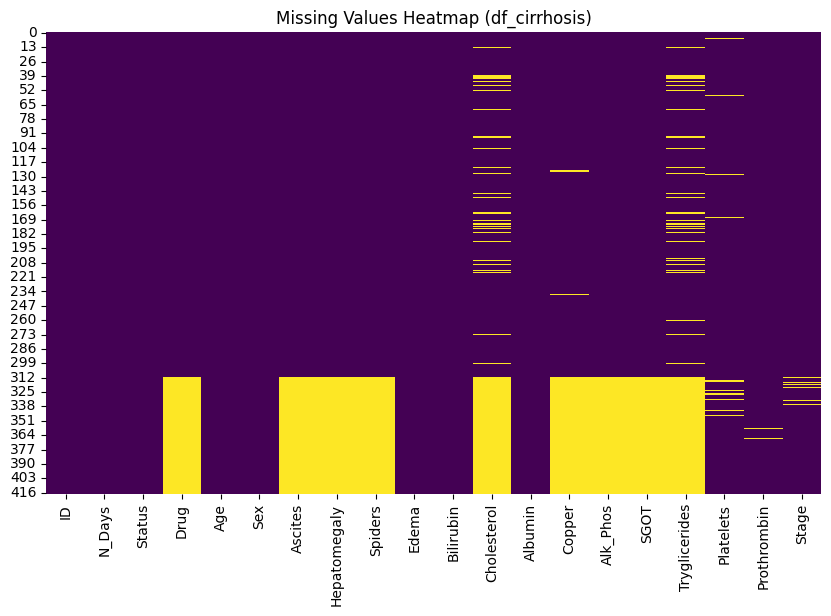

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cirrhosis.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (df_cirrhosis)')
plt.show()

In [34]:
print("\nMissing values in df_main:")
missing_main = df_main.isnull().sum()
missing_percentage_main = (missing_main / len(df_main)) * 100
print(missing_percentage_main)


Missing values in df_main:
ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
TB                0.000000
DB                0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
SGPT              0.000000
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64


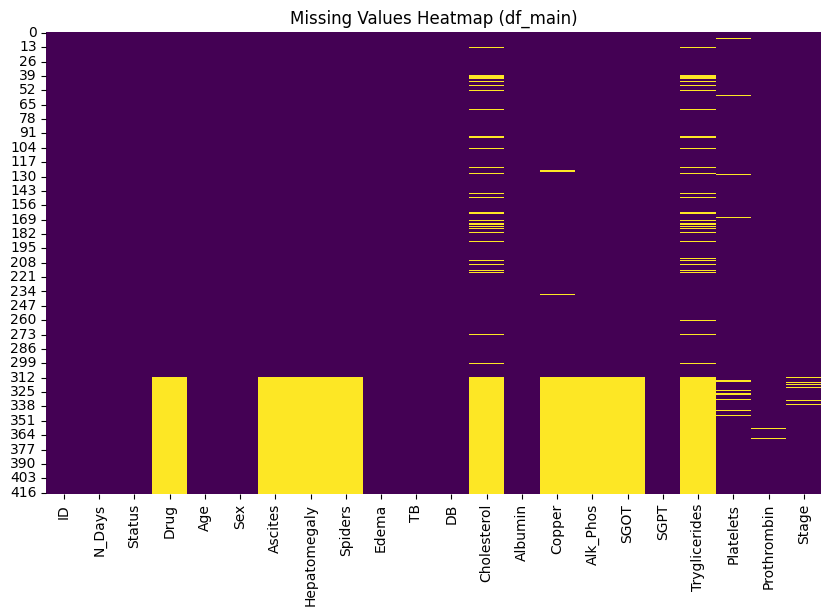

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_main.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (df_main)')
plt.show()

In [36]:
# 3. Descriptive Statistics
print("\nDescriptive statistics for df_cirrhosis:")
numerical_cols_cirrhosis = df_cirrhosis.select_dtypes(include=['number']).columns
display(df_cirrhosis[numerical_cols_cirrhosis].describe())


Descriptive statistics for df_cirrhosis:


ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   26.350000      33.000000   
25%      3.242500   41.250000    871.500000   80.600000      84.250000   
50%      3.530000   73.000000   1259.000000  114.700000     108.000000   
75%      3.770000  123.000000   1980.000000  151.900000     151.000000   
max      4.640000  588.000000  13862.400000  457.250000     598.000000   

        Platelets  Prothrombin       Stage  
count  407.000000   416.000000  412.000000  
mean   257.024570    10.731731    3.024272  
std     98.325585     1.022000    0.882042  
min     62.000000     9.000000    1.000000  
25%    188.500000    10.000000    2.000000  
50%    251.000000    10.600000    3.000000  
75%    318.000000    11.100000    4.000000  
max    721.000000    18.000000    4.000000

In [37]:
print("\nDescriptive statistics for df_main:")
numerical_cols_main = df_main.select_dtypes(include=['number']).columns
display(df_main[numerical_cols_main].describe())


Descriptive statistics for df_main:


ID       N_Days           Age          TB          DB  \
count  418.000000   418.000000    418.000000  418.000000  418.000000   
mean   209.500000  1917.782297  18533.351675    2.725359    1.169139   
std    120.810458  1104.672992   3815.845055    5.415824    2.126521   
min      1.000000    41.000000   9598.000000    0.500000    0.100000   
25%    105.250000  1092.750000  15644.500000    0.800000    0.200000   
50%    209.500000  1730.000000  18628.000000    1.000000    0.300000   
75%    313.750000  2613.500000  21272.500000    2.275000    1.100000   
max    418.000000  4795.000000  28650.000000   75.000000   14.200000   

       Cholesterol     Albumin      Copper      Alk_Phos        SGOT  \
count   284.000000  418.000000  310.000000    312.000000  312.000000   
mean    369.510563    3.497440   97.648387   1982.655769  122.556346   
std     231.944545    0.424972   85.613920   2140.388824   56.699525   
min     120.000000    1.960000    4.000000    289.000000   26.350000   
25%     249.500000    3.242500   41.250000    871.500000   80.600000   
50%     309.500000    3.530000   73.000000   1259.000000  114.700000   
75%     400.000000    3.770000  123.000000   1980.000000  151.900000   
max    1775.000000    4.640000  588.000000  13862.400000  457.250000   

              SGPT  Tryglicerides   Platelets  Prothrombin       Stage  
count   418.000000     282.000000  407.000000   416.000000  412.000000  
mean     86.325359     124.702128  257.024570    10.731731    3.024272  
std     206.185592      65.148639   98.325585     1.022000    0.882042  
min      10.000000      33.000000   62.000000     9.000000    1.000000  
25%      24.000000      84.250000  188.500000    10.000000    2.000000  
50%      35.000000     108.000000  251.000000    10.600000    3.000000  
75%      60.000000     151.000000  318.000000    11.100000    4.000000  
max    2000.000000     598.000000  721.000000    18.000000    4.000000

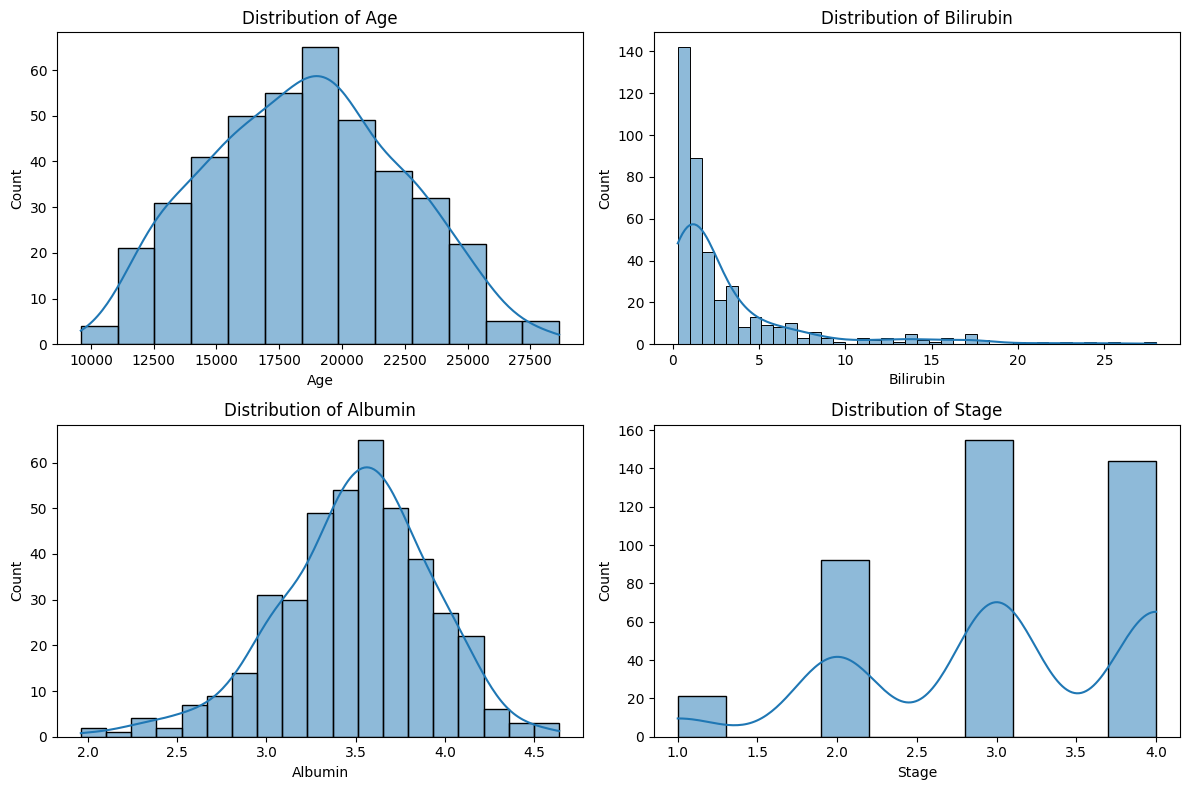

In [38]:
# 4. Data Distribution Visualization
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Bilirubin', 'Albumin', 'Stage']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_cirrhosis[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


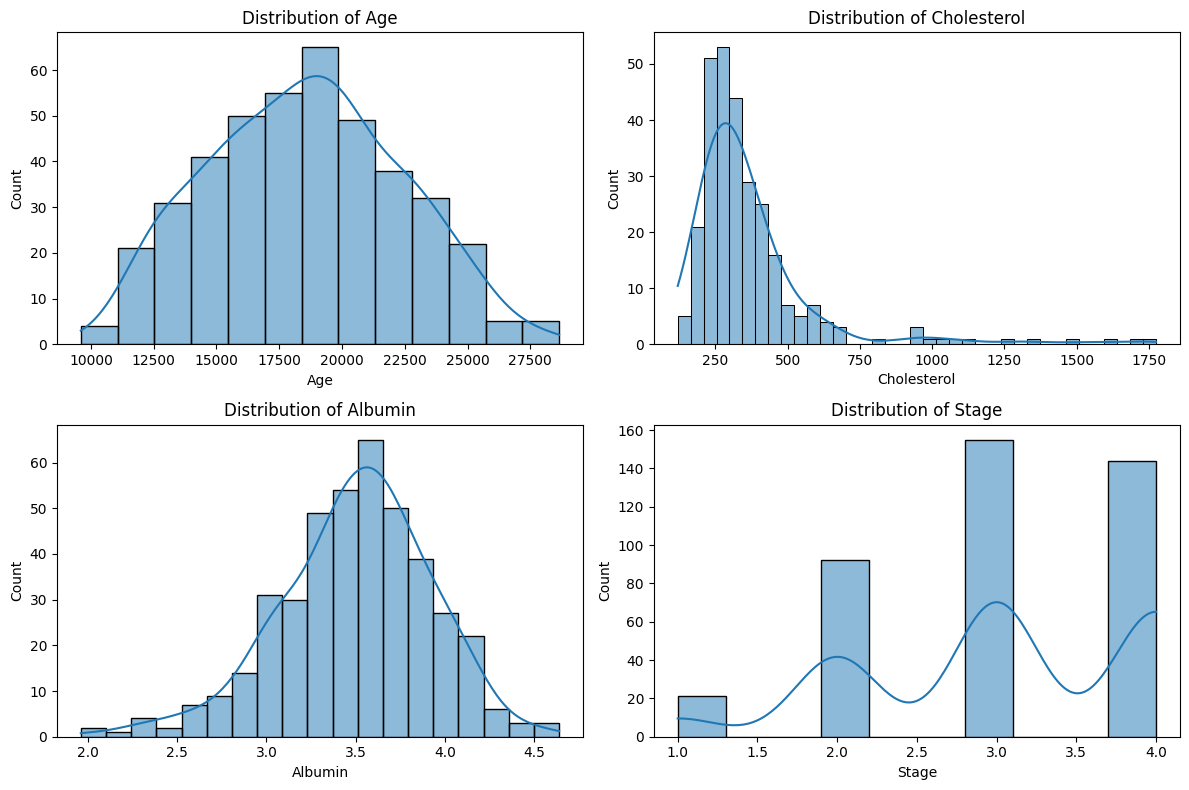

In [39]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Cholesterol', 'Albumin', 'Stage']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_main[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Frequencies for Status in df_cirrhosis:


Status
C     232
D     161
CL     25
Name: count, dtype: int64

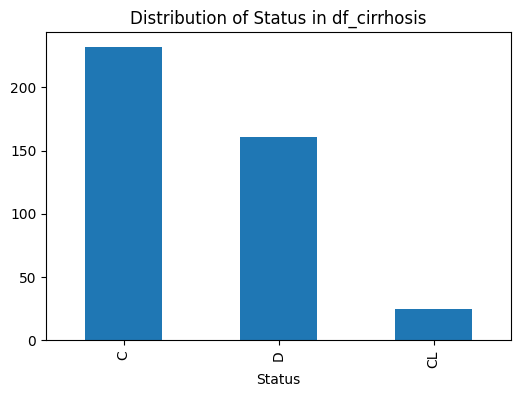


Frequencies for Drug in df_cirrhosis:


Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

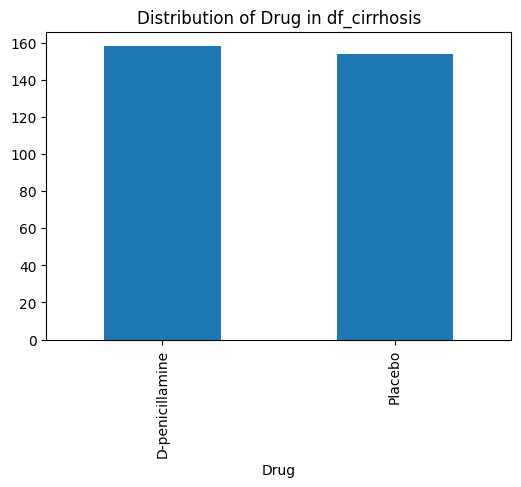


Frequencies for Sex in df_cirrhosis:


Sex
F    374
M     44
Name: count, dtype: int64

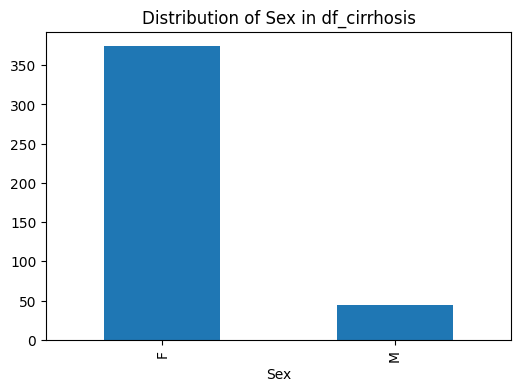


Frequencies for Ascites in df_cirrhosis:


Ascites
N    288
Y     24
Name: count, dtype: int64

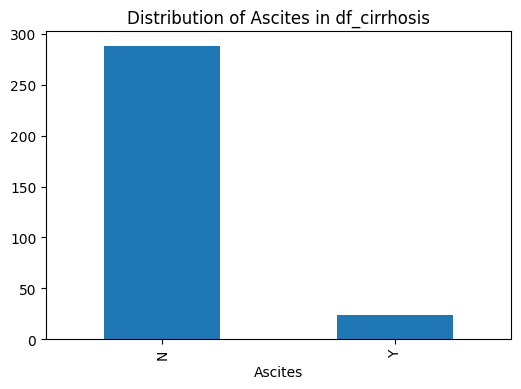


Frequencies for Hepatomegaly in df_cirrhosis:


Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

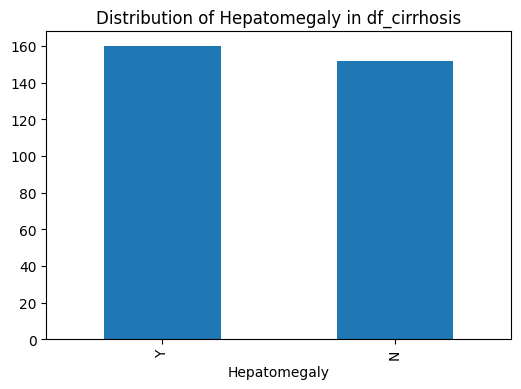


Frequencies for Spiders in df_cirrhosis:


Spiders
N    222
Y     90
Name: count, dtype: int64

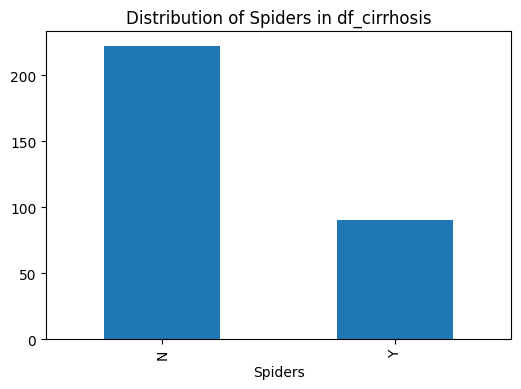


Frequencies for Edema in df_cirrhosis:


Edema
N    354
S     44
Y     20
Name: count, dtype: int64

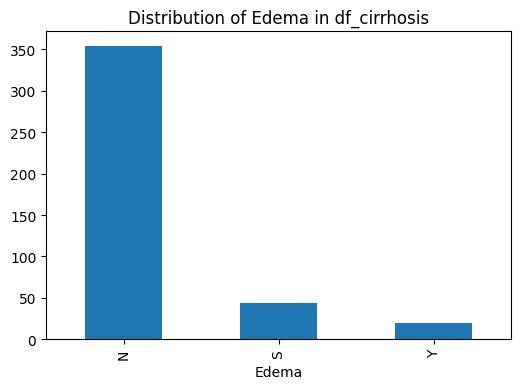

In [40]:
# 5. Categorical Variable Analysis (partial - frequencies and basic bar plots)
categorical_cols_cirrhosis = df_cirrhosis.select_dtypes(include=['object']).columns
for col in categorical_cols_cirrhosis:
    print(f"\nFrequencies for {col} in df_cirrhosis:")
    display(df_cirrhosis[col].value_counts())
    plt.figure(figsize=(6, 4))
    df_cirrhosis[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col} in df_cirrhosis')
    plt.show()


Frequencies for Status in df_main:


Status
C     232
D     161
CL     25
Name: count, dtype: int64

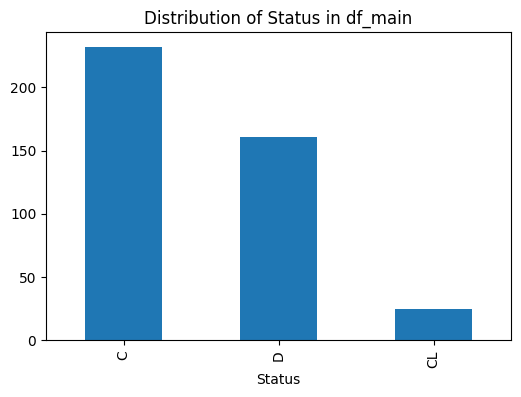


Frequencies for Drug in df_main:


Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

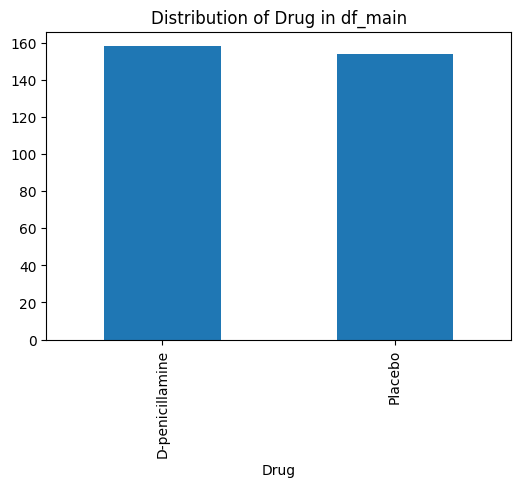


Frequencies for Sex in df_main:


Sex
F    374
M     44
Name: count, dtype: int64

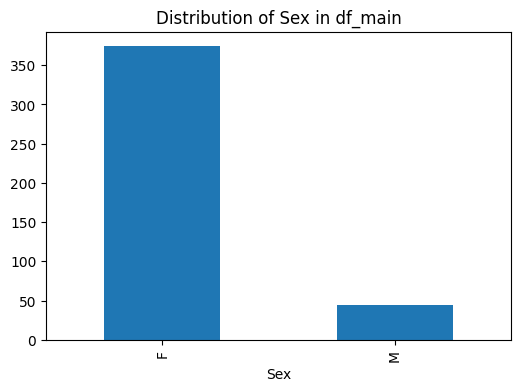


Frequencies for Ascites in df_main:


Ascites
N    288
Y     24
Name: count, dtype: int64

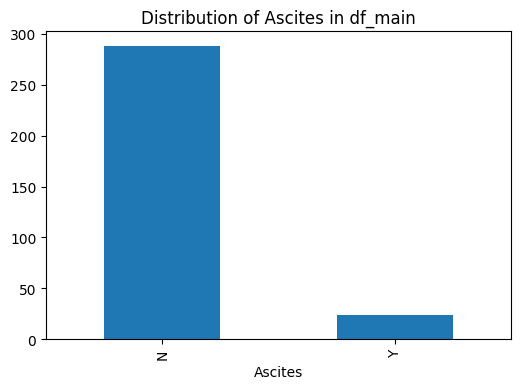


Frequencies for Hepatomegaly in df_main:


Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

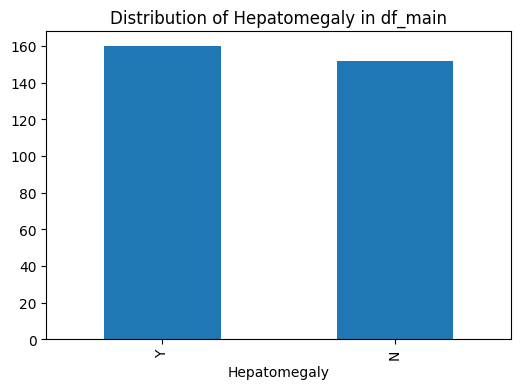


Frequencies for Spiders in df_main:


Spiders
N    222
Y     90
Name: count, dtype: int64

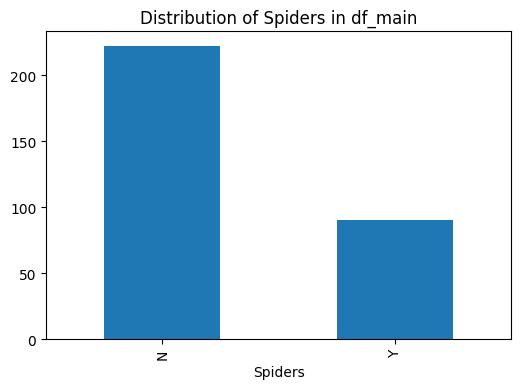


Frequencies for Edema in df_main:


Edema
N    354
S     44
Y     20
Name: count, dtype: int64

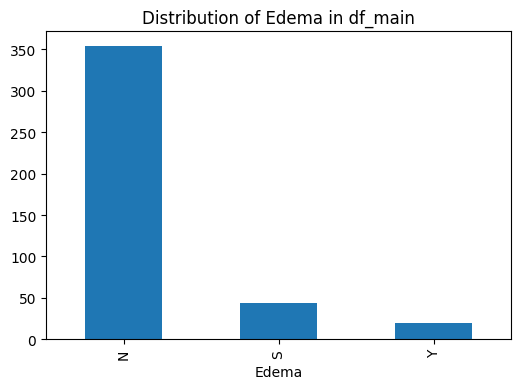

In [37]:
categorical_cols_main = df_main.select_dtypes(include=['object']).columns
for col in categorical_cols_main:
    print(f"\nFrequencies for {col} in df_main:")
    display(df_main[col].value_counts())
    plt.figure(figsize=(6, 4))
    df_main[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col} in df_main')
    plt.show()

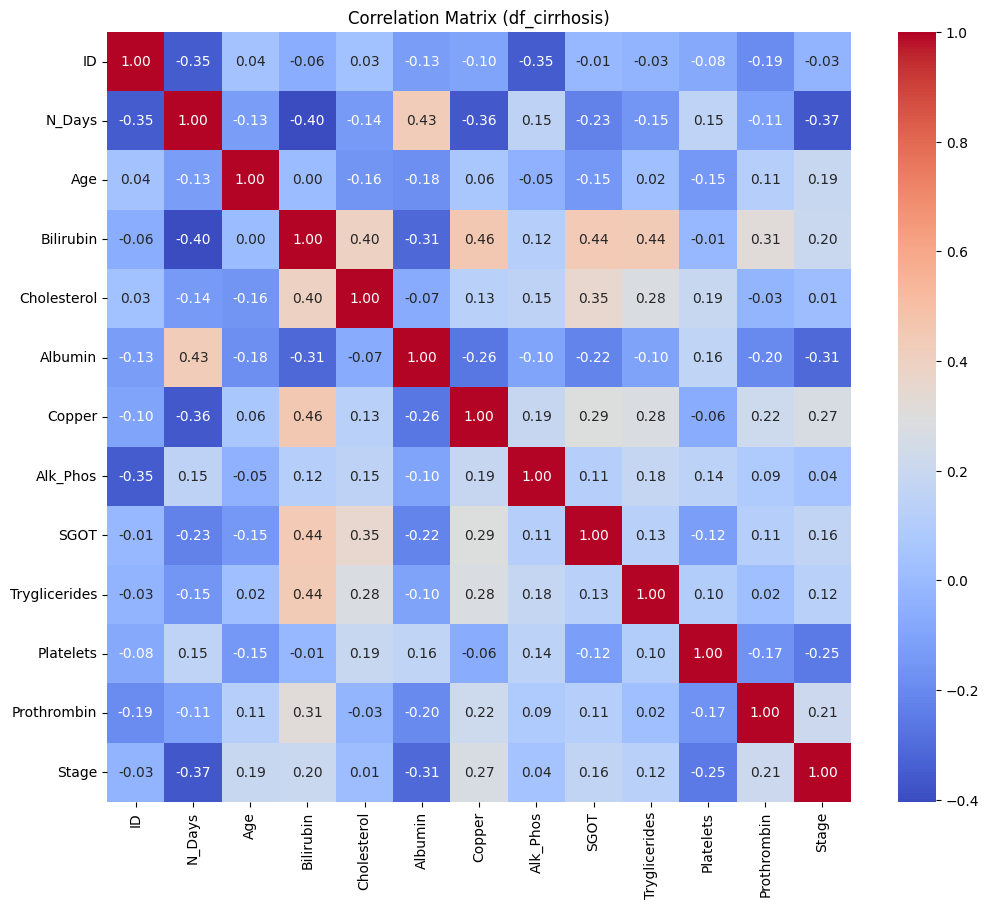

In [41]:
# 6. Initial Correlation Analysis (df_cirrhosis)
plt.figure(figsize=(12, 10))
sns.heatmap(df_cirrhosis[numerical_cols_cirrhosis].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (df_cirrhosis)')
plt.show()

## Data cleaning

### Subtask:
Clean the "cirrhosis.csv" and "Main_data.csv" datasets.


**Reasoning**:
Handle missing values and outliers in both dataframes, and correct data types.



In [42]:
# Handle missing values in df_cirrhosis
for col in df_cirrhosis.columns:
    if df_cirrhosis[col].isnull().sum() > 0:
        if df_cirrhosis[col].dtype in ['float64', 'int64']:
            df_cirrhosis[col].fillna(df_cirrhosis[col].median(), inplace=True)
        else:  # Categorical columns
            df_cirrhosis[col].fillna(df_cirrhosis[col].mode()[0], inplace=True)

<ipython-input-42-461e447dd673>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cirrhosis[col].fillna(df_cirrhosis[col].mode()[0], inplace=True)
<ipython-input-42-461e447dd673>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [43]:
# Handle missing values in df_main
for col in df_main.columns:
    if df_main[col].isnull().sum() > 0:
        if df_main[col].dtype in ['float64', 'int64']:
            df_main[col].fillna(df_main[col].median(), inplace=True)
        else:  # Categorical columns
            df_main[col].fillna(df_main[col].mode()[0], inplace=True)

<ipython-input-43-a8fe8595f15d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main[col].fillna(df_main[col].mode()[0], inplace=True)
<ipython-input-43-a8fe8595f15d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [44]:
# Outlier handling (using IQR method)
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

for col in ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets','Prothrombin']:
    if col in df_cirrhosis.columns:
        handle_outliers_iqr(df_cirrhosis, col)
    if col in df_main.columns:
        handle_outliers_iqr(df_main, col)

In [45]:
# Correct data types
for col in ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']:
  if col in df_cirrhosis.columns:
    df_cirrhosis[col] = df_cirrhosis[col].astype('category')
  if col in df_main.columns:
    df_main[col] = df_main[col].astype('category')

display(df_cirrhosis.head())
display(df_main.head())

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y        7.3        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    2745.0  113.52   
2     S        1.4        176.0     3.48   175.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    2745.0   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  ...  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  SGPT  \
0     Y  ...        261.0     2.60   156.0    1718.0  137.95    16   
1     N  ...        302.0     4.14    54.0    2745.0  113.52    64   
2     S  ...        176.0     3.48   175.0     516.0   96.10    60   
3     S  ...        244.0     2.54    64.0    2745.0   60.63    14   
4     N  ...        279.0     3.53   143.0     671.0  113.15    27   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0  

[5 rows x 22 columns]

**Reasoning**:
Fix the chained assignment warnings and regenerate the code block for data cleaning.



## Data preparation

### Subtask:
Prepare the cleaned "cirrhosis.csv" dataset (`df_cirrhosis`) for model training and the "Main_data.csv" dataset (`df_main`) for correlation analysis.


In [46]:
# Define categorical and numerical features for df_cirrhosis
categorical_cols_cirrhosis = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
numerical_cols_cirrhosis = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
target_col_cirrhosis = 'Stage'


In [47]:
# Create transformers for df_cirrhosis
numerical_transformer_cirrhosis = StandardScaler()
categorical_transformer_cirrhosis = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor_cirrhosis = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_cirrhosis, numerical_cols_cirrhosis),
        ('cat', categorical_transformer_cirrhosis, categorical_cols_cirrhosis)
    ])


In [48]:

# Fit and transform df_cirrhosis
X_cirrhosis = preprocessor_cirrhosis.fit_transform(df_cirrhosis.drop(columns=[target_col_cirrhosis, 'ID']))
y_cirrhosis = df_cirrhosis[target_col_cirrhosis]


In [49]:
# Fit the categorical transformer before getting feature names
categorical_transformer_cirrhosis.fit(df_cirrhosis[categorical_cols_cirrhosis])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [50]:
# Get feature names for cirrhosis after one-hot encoding
feature_names_cirrhosis = list(numerical_cols_cirrhosis)
feature_names_cirrhosis.extend(list(categorical_transformer_cirrhosis.get_feature_names_out(categorical_cols_cirrhosis)))

In [51]:
# Define features for df_main - Corrected column names
categorical_cols_main = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
# 'Bilirubin' is not in df_main, use the columns that are actually present
numerical_cols_main = ['N_Days', 'Age', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'SGPT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Create transformers for df_main
numerical_transformer_main = StandardScaler()
categorical_transformer_main = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


In [52]:

preprocessor_main = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_main, numerical_cols_main),
        ('cat', categorical_transformer_main, categorical_cols_main)
    ])


In [53]:
# Fit and transform df_main
X_main = preprocessor_main.fit_transform(df_main.drop(columns=['ID']))

In [54]:
# Fit the categorical transformer before getting feature names
categorical_transformer_main.fit(df_main[categorical_cols_main])


OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [55]:
# Get feature names for main after one-hot encoding
feature_names_main = list(numerical_cols_main)
feature_names_main.extend(list(categorical_transformer_main.get_feature_names_out(categorical_cols_main)))

In [56]:
# Convert to dataframes with correct column names
X_cirrhosis_df = pd.DataFrame(X_cirrhosis, columns=feature_names_cirrhosis)
X_main_df = pd.DataFrame(X_main, columns=feature_names_main)
display(X_cirrhosis_df.head())

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
0 -1.375612  0.768941   2.095896    -0.762065 -2.181807  1.615301  0.466257   
1  2.340341  0.546706  -0.606992    -0.215235  1.547034 -0.609109  2.077080   
2 -0.820938  1.852567  -0.476207    -1.895735 -0.051040  2.029652 -1.419049   
3  0.006542  0.383244  -0.301827    -0.988799 -2.327086 -0.391030  2.077080   
4 -0.375023 -1.210972   0.395692    -0.521993  0.070026  1.331798 -1.175935   

       SGOT  Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  \
0  0.503760       1.779973  -0.701798  ...    0.0        0.0        1.0   
1 -0.105477      -0.750443  -0.372315  ...    0.0        1.0        0.0   
2 -0.539898      -1.744534  -1.116310  ...    1.0        1.0        0.0   
3 -1.424451      -0.629947  -0.776198  ...    0.0        1.0        0.0   
4 -0.114704      -1.232427  -1.275737  ...    0.0        1.0        0.0   

   Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  \
0             0.0             1.0        0.0        1.0      0.0      0.0   
1             0.0             1.0        0.0        1.0      1.0      0.0   
2             1.0             0.0        1.0        0.0      0.0      1.0   
3             0.0             1.0        0.0        1.0      0.0      1.0   
4             0.0             1.0        0.0        1.0      1.0      0.0   

   Edema_Y  
0      1.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 27 columns]

In [57]:
display(X_main_df.head())

N_Days       Age  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0 -1.375612  0.768941    -0.762065 -2.181807  1.615301  0.466257  0.503760   
1  2.340341  0.546706    -0.215235  1.547034 -0.609109  2.077080 -0.105477   
2 -0.820938  1.852567    -1.895735 -0.051040  2.029652 -1.419049 -0.539898   
3  0.006542  0.383244    -0.988799 -2.327086 -0.391030  2.077080 -1.424451   
4 -0.375023 -1.210972    -0.521993  0.070026  1.331798 -1.175935 -0.114704   

       SGPT  Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  \
0 -0.341487       1.779973  -0.701798  ...    0.0        0.0        1.0   
1 -0.108408      -0.750443  -0.372315  ...    0.0        1.0        0.0   
2 -0.127831      -1.744534  -1.116310  ...    1.0        1.0        0.0   
3 -0.351198      -0.629947  -0.776198  ...    0.0        1.0        0.0   
4 -0.288073      -1.232427  -1.275737  ...    0.0        1.0        0.0   

   Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  \
0             0.0             1.0        0.0        1.0      0.0      0.0   
1             0.0             1.0        0.0        1.0      1.0      0.0   
2             1.0             0.0        1.0        0.0      0.0      1.0   
3             0.0             1.0        0.0        1.0      0.0      1.0   
4             0.0             1.0        0.0        1.0      1.0      0.0   

   Edema_Y  
0      1.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 27 columns]

## Data analysis

### Subtask:
Perform exploratory data analysis (EDA) on the cleaned 'cirrhosis.csv' dataset (df_cirrhosis) to understand the relationships between features and the target variable 'Stage'.


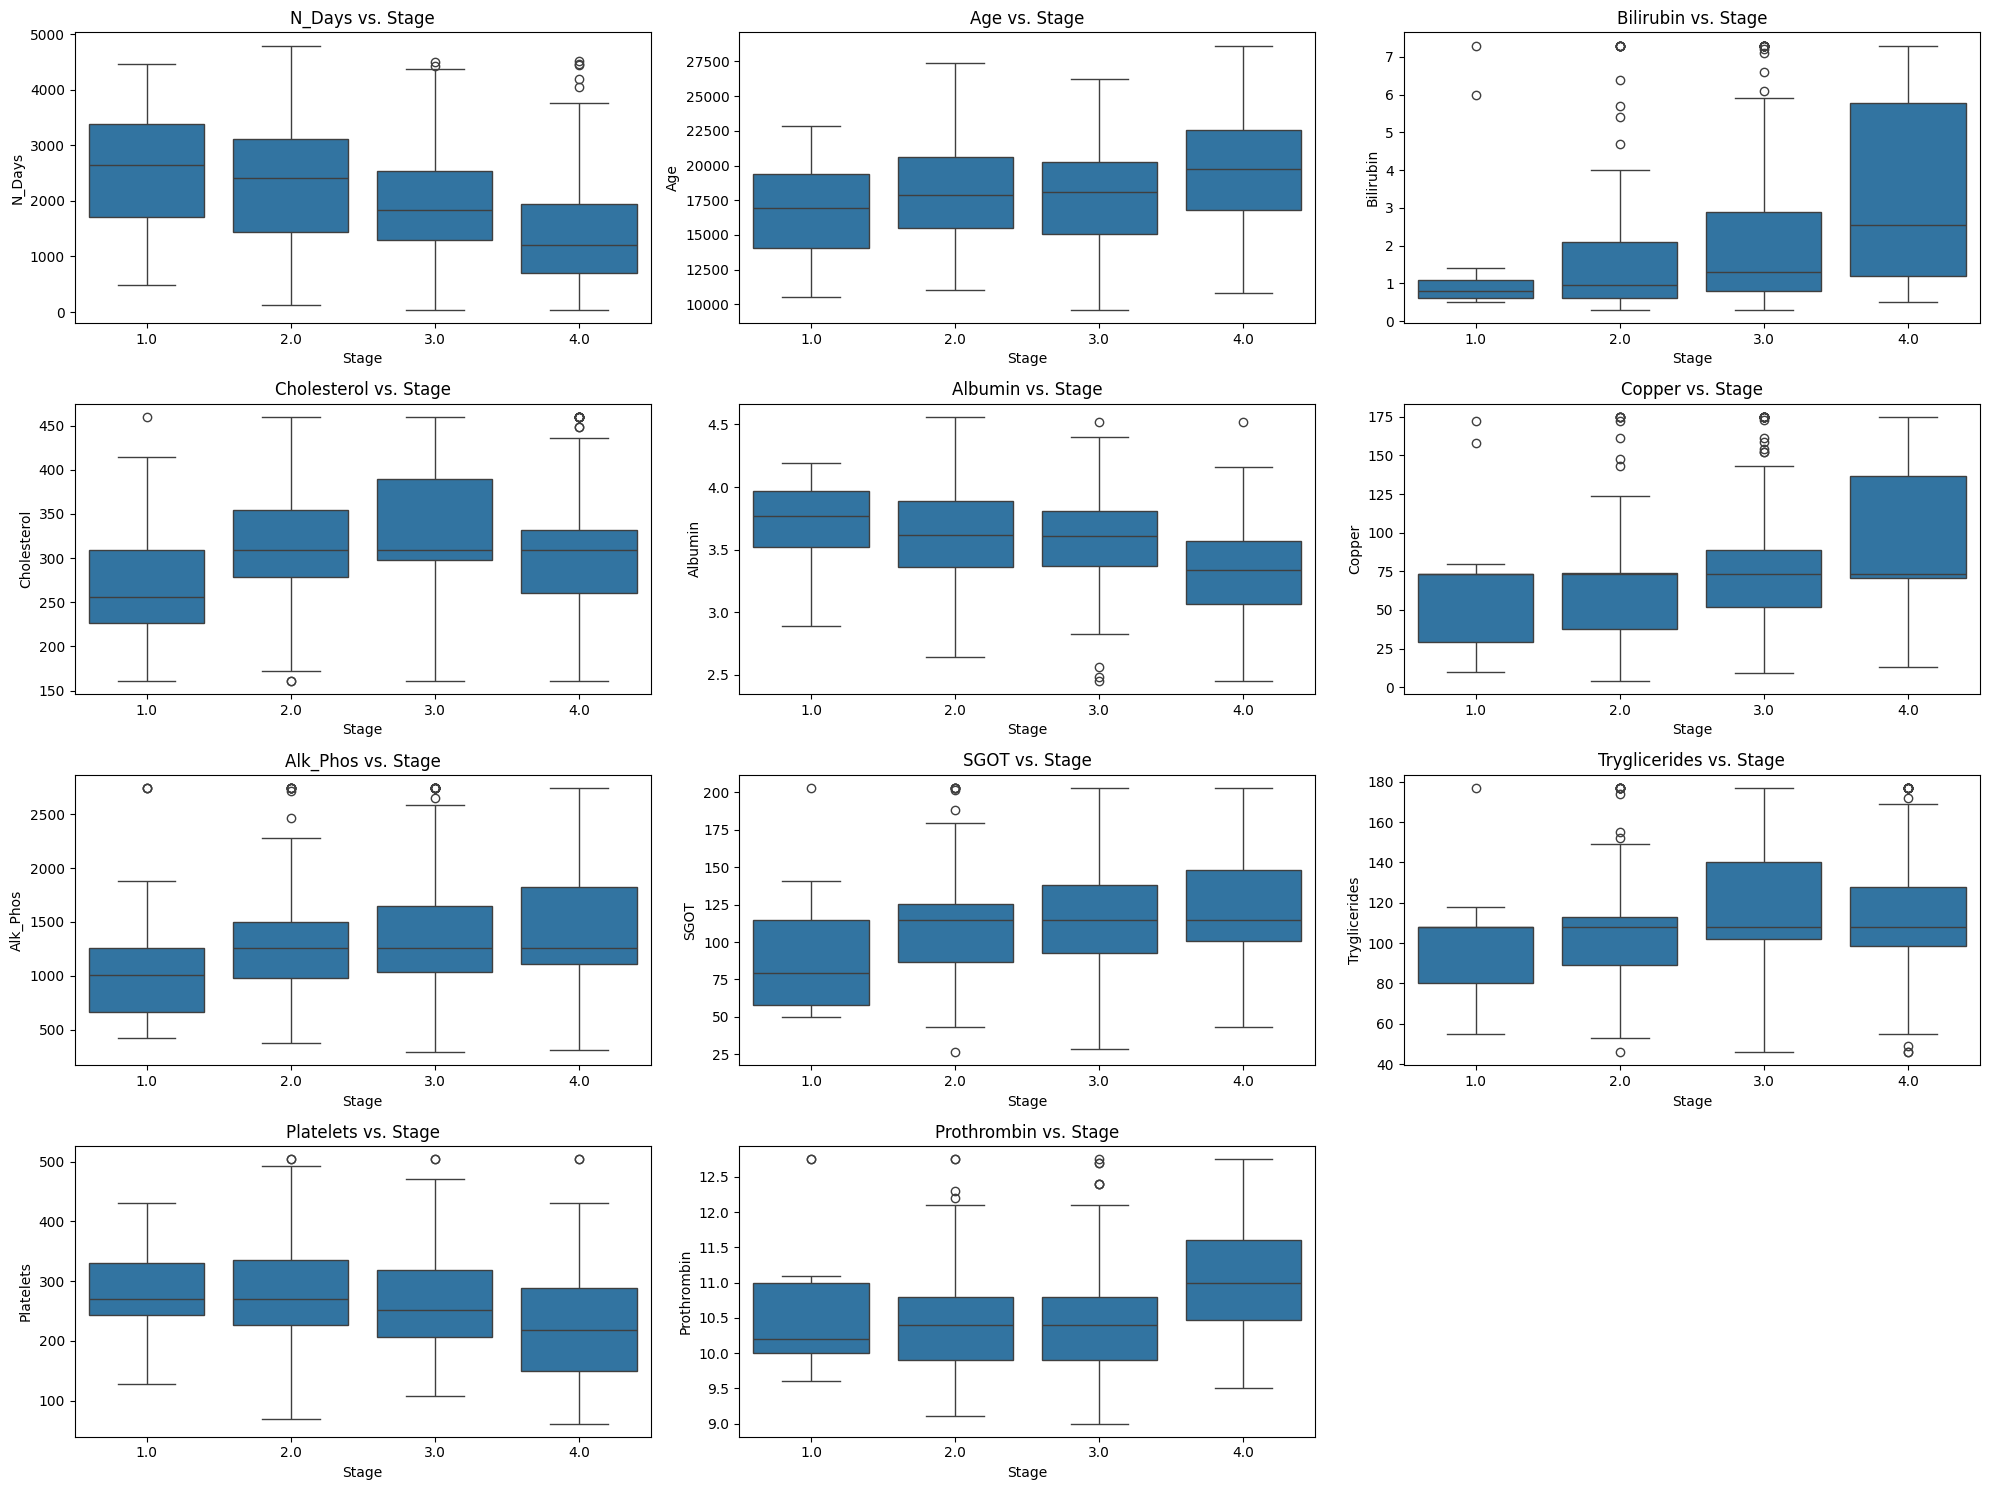

In [68]:
# Numerical features vs. Stage
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='Stage', y=col, data=df_cirrhosis)
    plt.title(f'{col} vs. Stage')
plt.tight_layout()
plt.show()

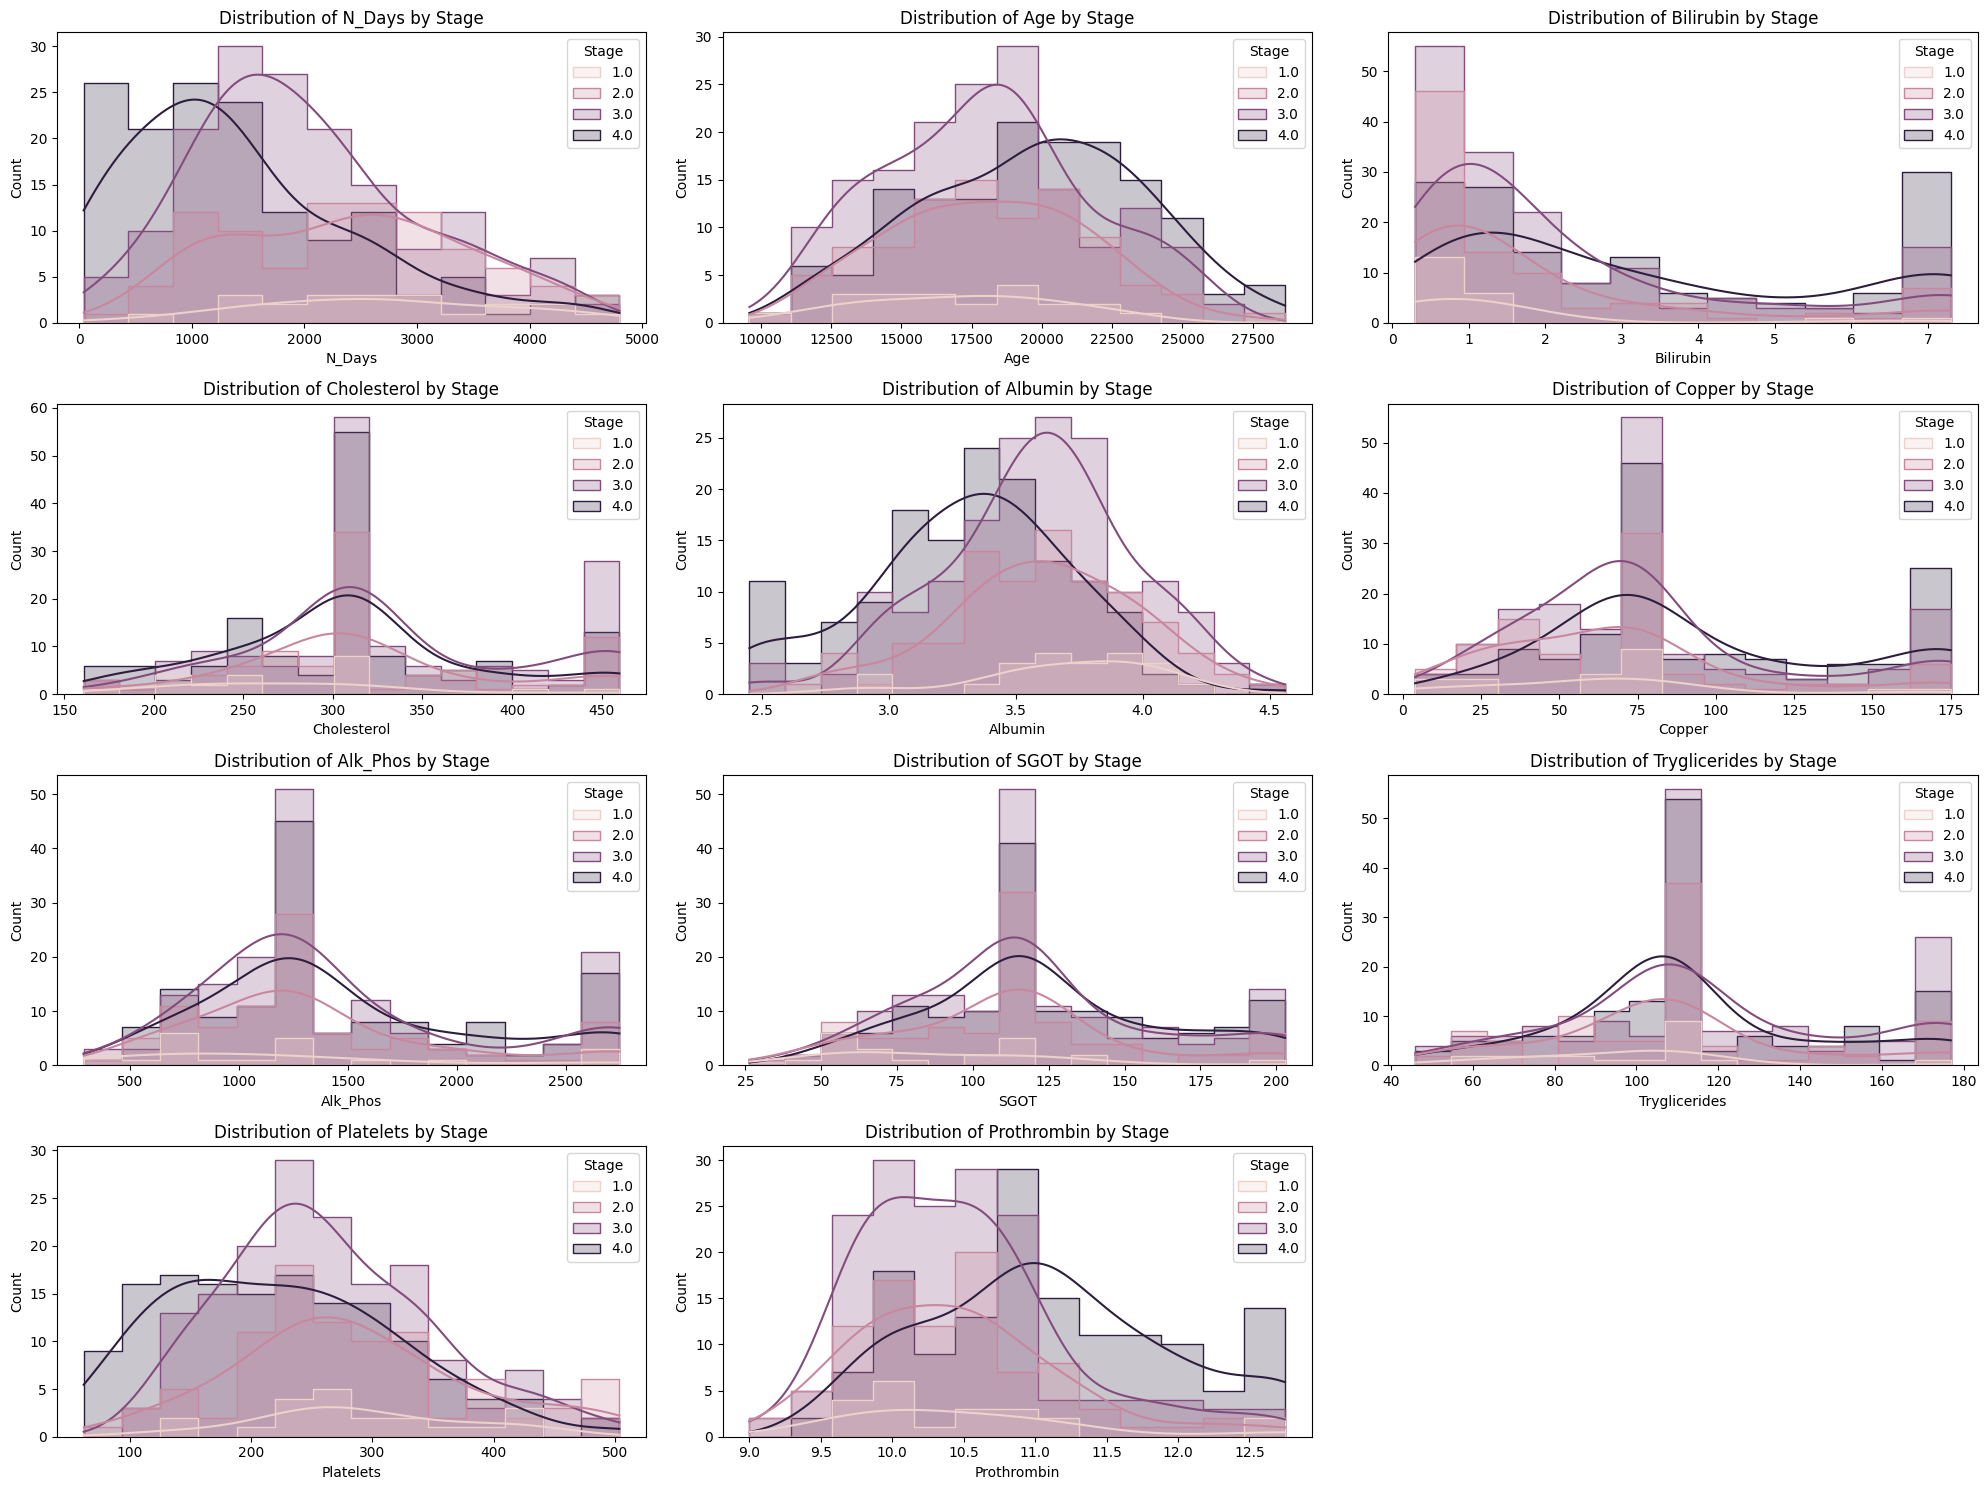

In [69]:
# Numerical features vs. Stage
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    # Pass the entire dataframe to data and specify x
    sns.histplot(data=df_cirrhosis, x=col, kde=True, hue='Stage', element="step")
    plt.title(f'Distribution of {col} by Stage')
plt.tight_layout()
plt.show()

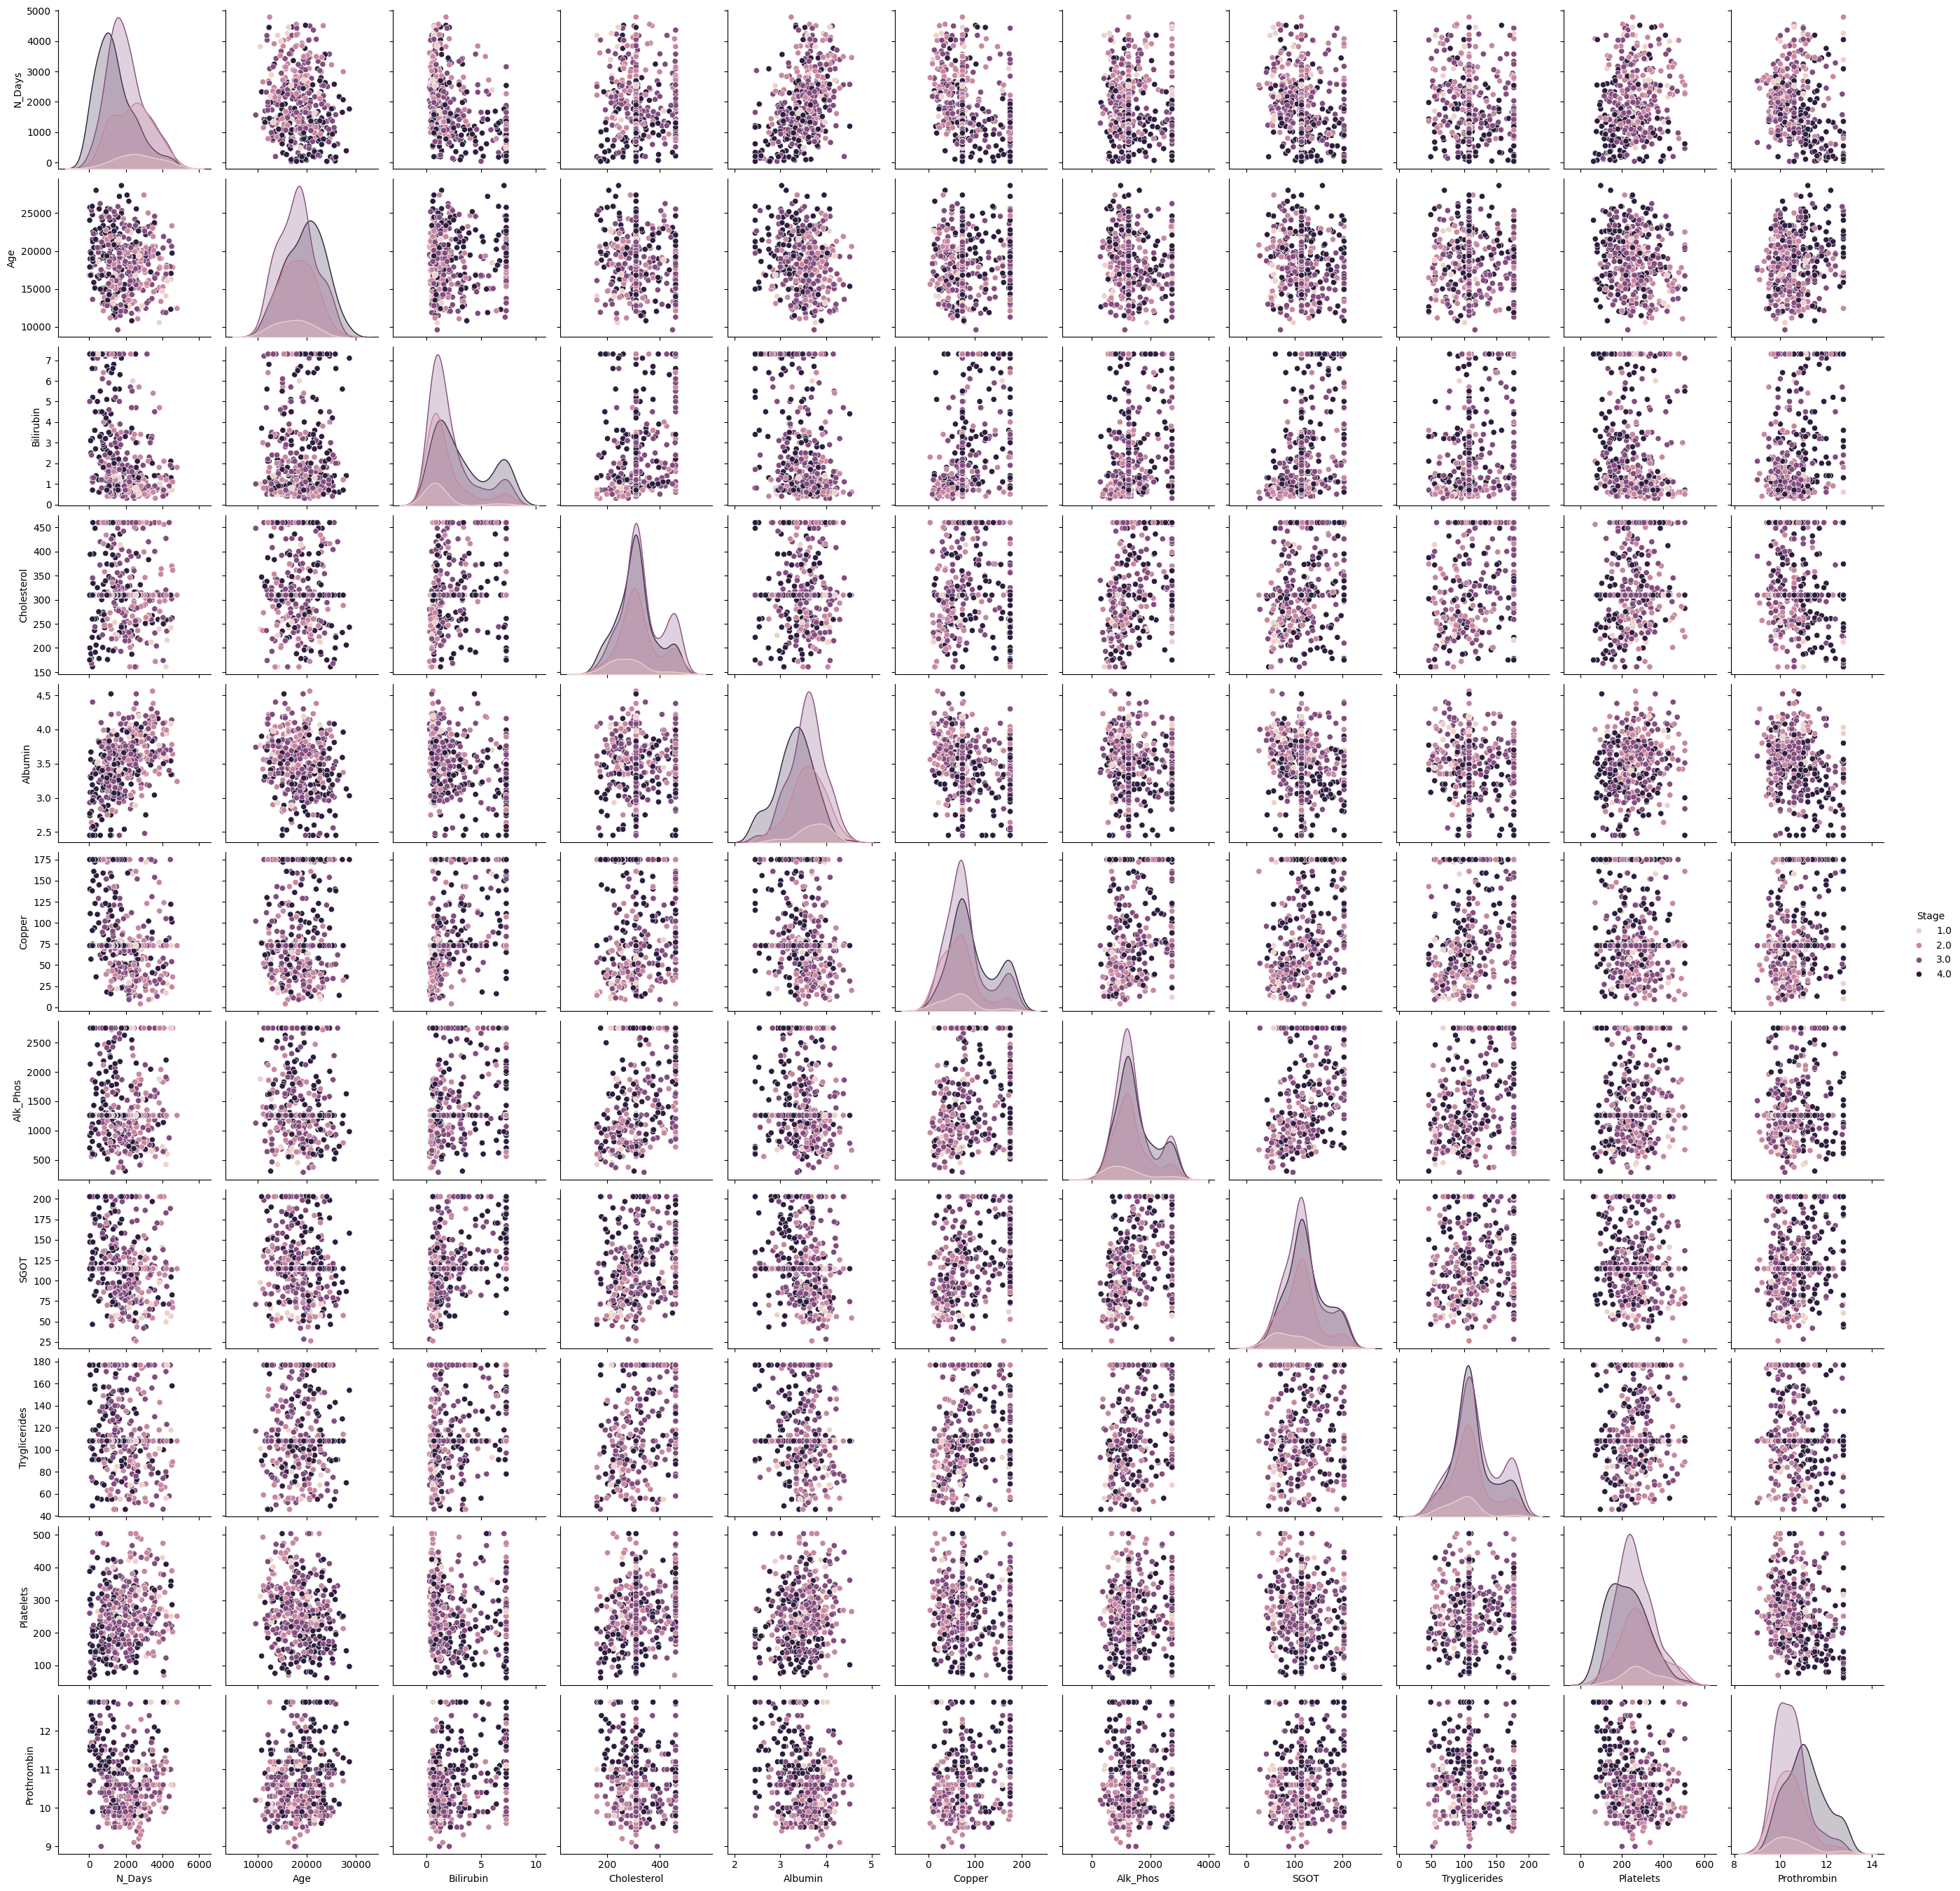

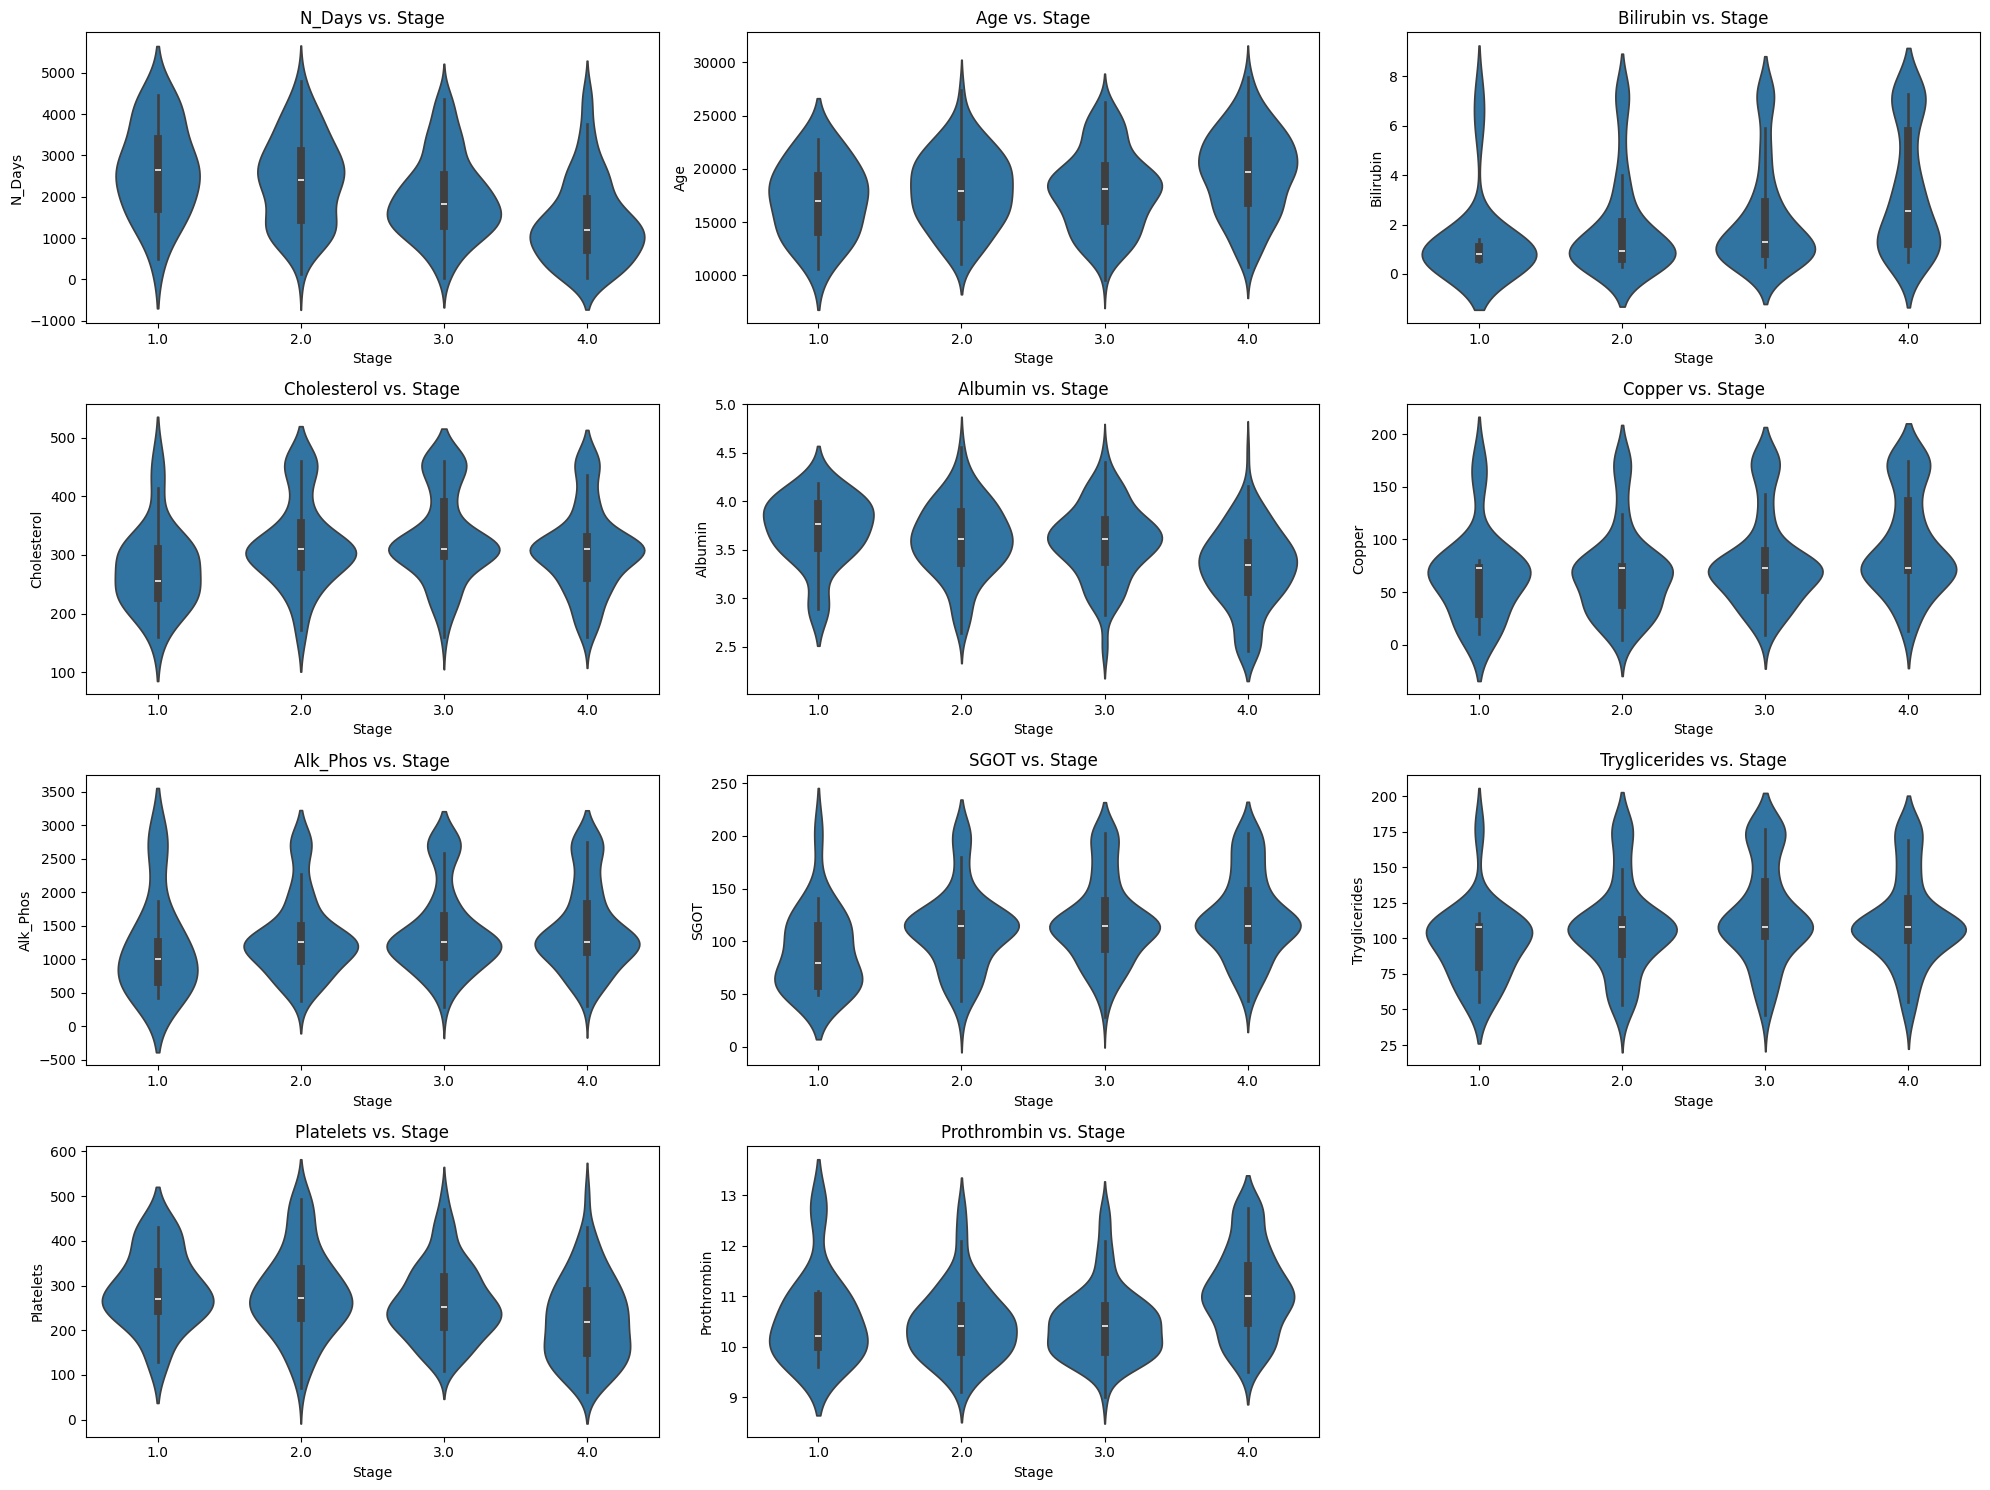

In [70]:
# Scatter plots of numerical features colored by Stage
sns.pairplot(df_cirrhosis[numerical_cols + ['Stage']], hue='Stage', diag_kind='kde')
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.violinplot(x='Stage', y=col, data=df_cirrhosis)
    plt.title(f'{col} vs. Stage')
plt.tight_layout()
plt.show()

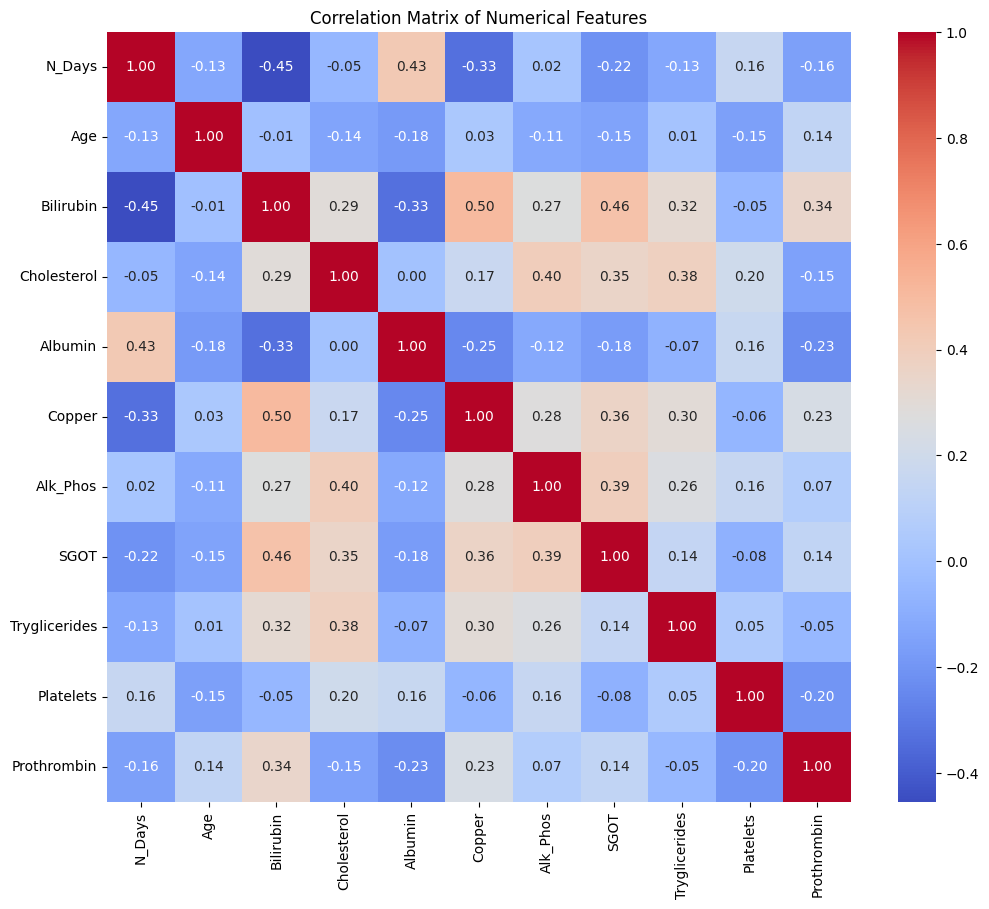

In [71]:
# Correlation Analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df_cirrhosis[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

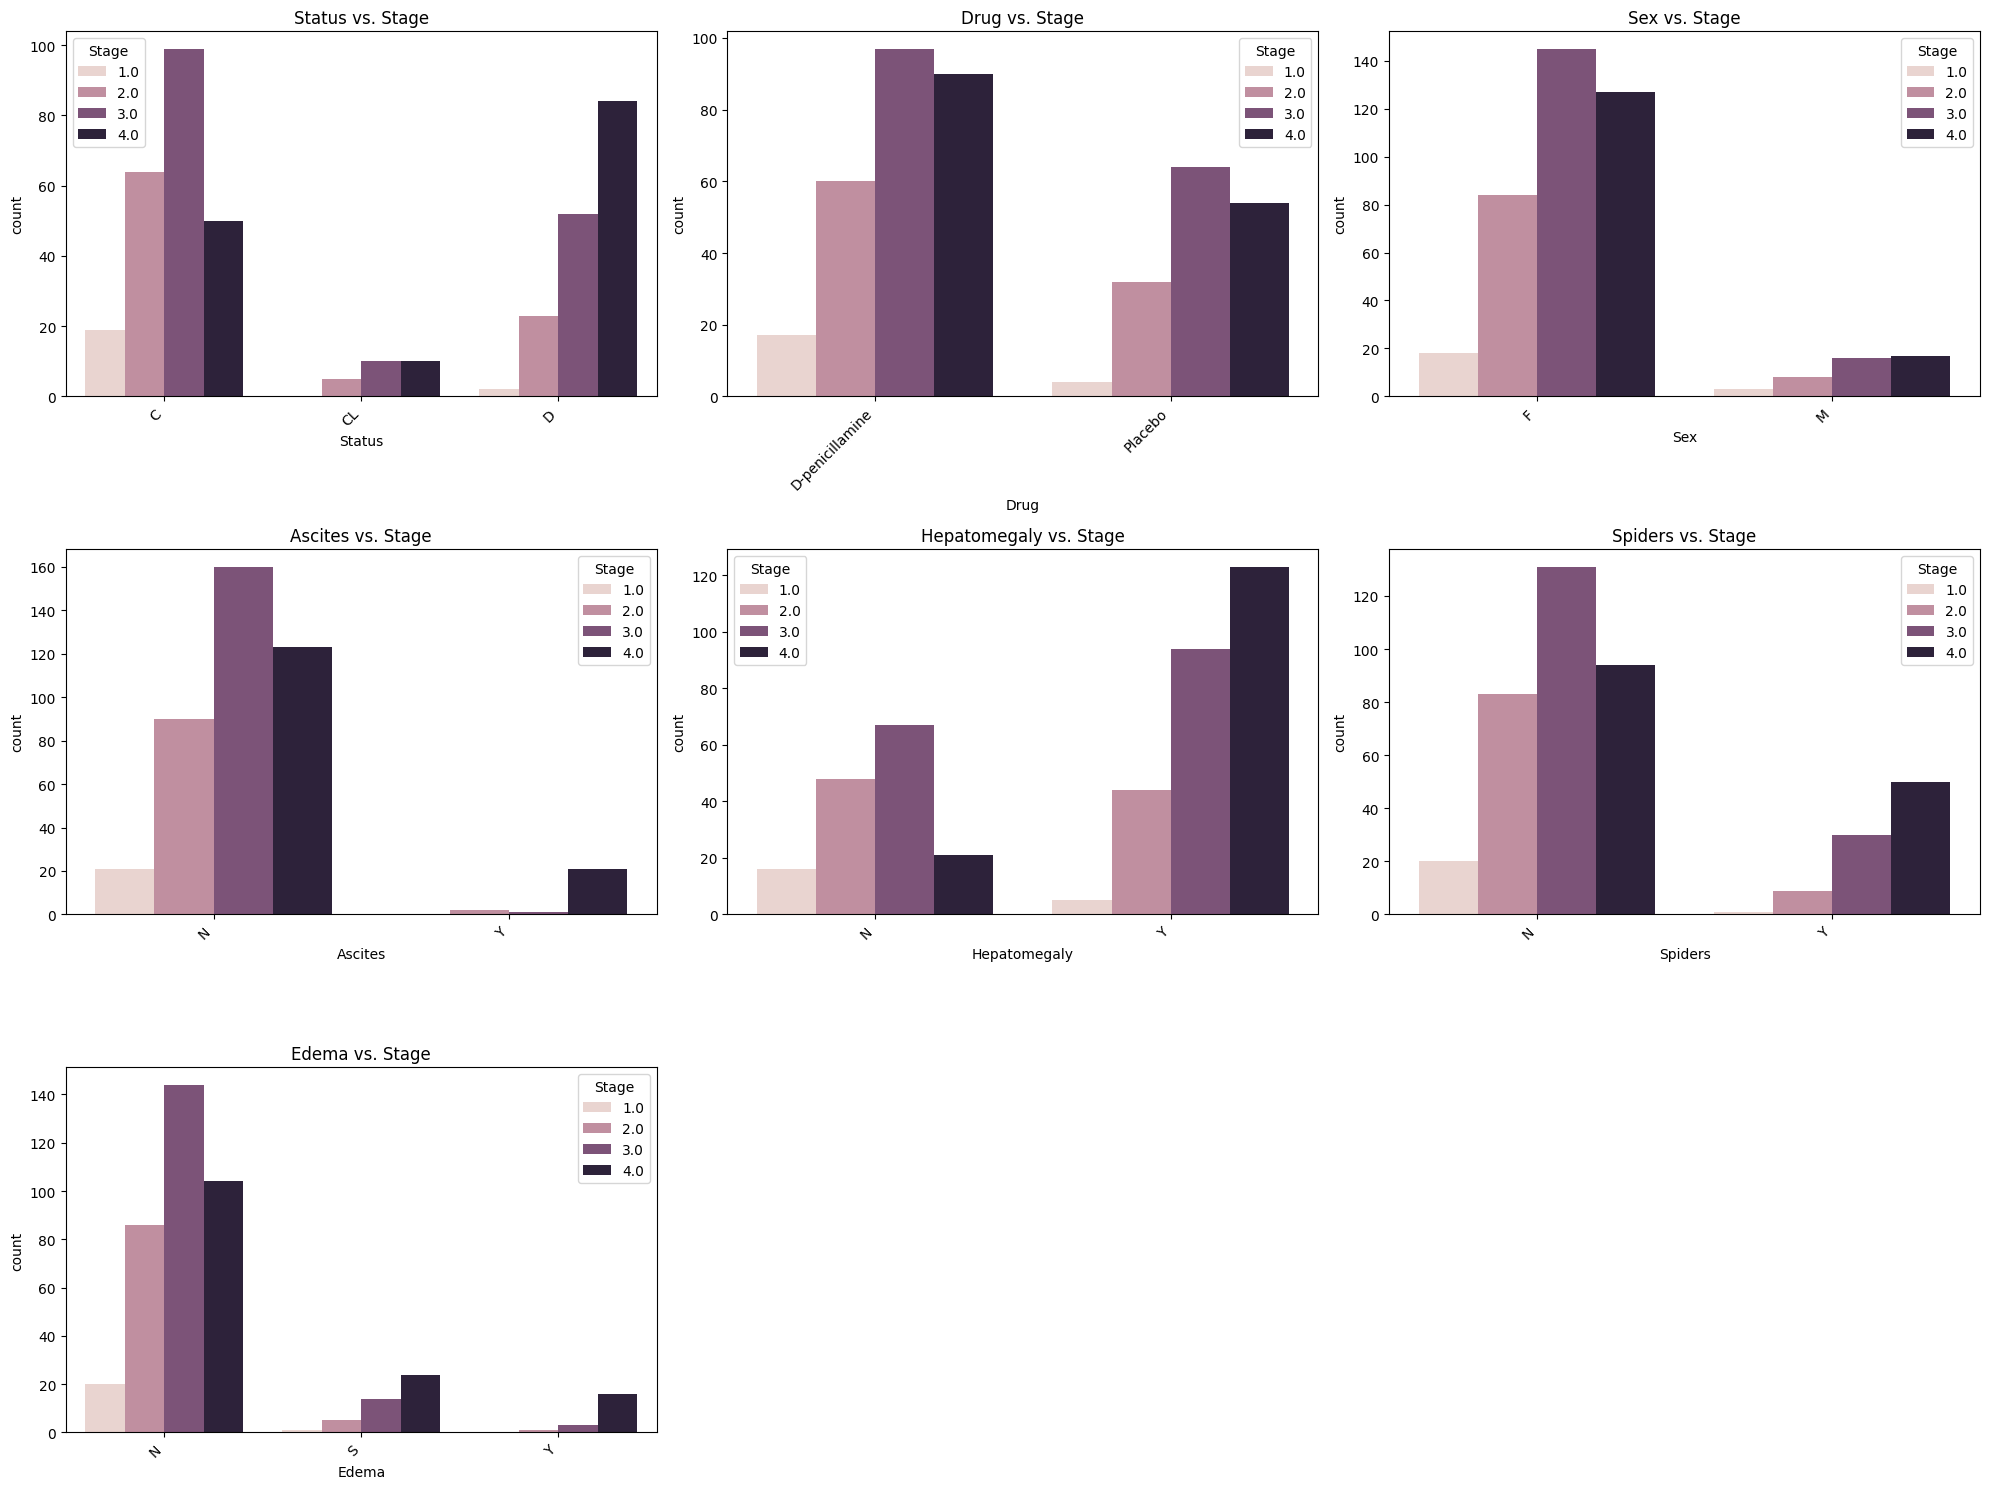

In [72]:
# Categorical Variable Analysis
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue='Stage', data=df_cirrhosis)
    plt.title(f'{col} vs. Stage')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data splitting

### Subtask:
Split the prepared "cirrhosis.csv" dataset (`X_cirrhosis_df`, `y_cirrhosis`) into training and testing sets.


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cirrhosis_df, y_cirrhosis, test_size=0.2, random_state=42, stratify=y_cirrhosis
)

## Feature engineering

### Subtask:
Engineer new features for the cirrhosis dataset to potentially improve model performance.


In [74]:
# Create interaction feature: Bilirubin * Albumin
X_train['Bilirubin_Albumin_Interaction'] = X_train['Bilirubin'] * X_train['Albumin']
X_test['Bilirubin_Albumin_Interaction'] = X_test['Bilirubin'] * X_test['Albumin']

# Create polynomial feature: Age^2
X_train['Age_Squared'] = X_train['Age'] ** 2
X_test['Age_Squared'] = X_test['Age'] ** 2

print("Feature engineering completed.  New features added to X_train and X_test.")

display(X_train.head())
display(X_test.head())

Feature engineering completed.  New features added to X_train and X_test.


N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
28   2.348498  1.258803  -0.781372     0.691701  0.675357 -1.263348  2.077080   
139  1.034320  0.319486  -0.606992    -0.375283  1.425968 -0.958037  1.096784   
42   2.391096 -0.179297  -0.606992     0.571665  0.336372 -1.001652  2.077080   
25  -0.429403  0.122964   1.180402     1.890390  0.433225 -0.630917  2.077080   
393 -0.499191  0.599707  -0.214637    -0.115206 -1.043784 -0.194758 -0.253673   

         SGOT  Tryglicerides  Platelets  ...  Ascites_Y  Hepatomegaly_N  \
28  -1.102750      -0.810691   1.423900  ...        0.0             1.0   
139  1.702035       0.996749   0.658649  ...        0.0             0.0   
42  -1.263601      -0.720319  -0.563628  ...        0.0             1.0   
25   1.199532       1.599229   1.753383  ...        0.0             0.0   
393 -0.076050      -0.147963  -1.870933  ...        0.0             0.0   

     Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  \
28              0.0        1.0        0.0      1.0      0.0      0.0   
139             1.0        1.0        0.0      1.0      0.0      0.0   
42              0.0        1.0        0.0      1.0      0.0      0.0   
25              1.0        0.0        1.0      1.0      0.0      0.0   
393             1.0        1.0        0.0      0.0      1.0      0.0   

     Bilirubin_Albumin_Interaction  Age_Squared  
28                       -0.527705     1.584585  
139                      -0.865552     0.102071  
42                       -0.204175     0.032148  
25                        0.511379     0.015120  
393                       0.224035     0.359648  

[5 rows x 29 columns]

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
380 -0.017023 -0.933637  -0.345422    -0.115206  0.384798 -0.194758 -0.253673   
242 -0.895257  1.604881   2.095896     1.890390 -1.673329  1.244566  0.922683   
121  1.250026  0.449888  -0.824967    -0.268585  1.522821 -1.154308 -1.039478   
330 -1.652949 -0.454271   0.264907    -0.115206  0.142666 -0.194758 -0.253673   
244 -0.115813 -0.476310  -0.824967    -0.602017  0.360585 -0.739957 -0.983013   

         SGOT  Tryglicerides  Platelets  ...  Ascites_Y  Hepatomegaly_N  \
380 -0.076050      -0.147963  -1.743391  ...        0.0             0.0   
242  2.011267       0.785881  -0.244773  ...        0.0             0.0   
121 -1.312978      -0.840815  -0.000318  ...        0.0             1.0   
330 -0.076050      -0.147963  -1.211966  ...        0.0             0.0   
244 -1.622210       1.926828   0.520478  ...        0.0             0.0   

     Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  \
380             1.0        1.0        0.0      1.0      0.0      0.0   
242             1.0        1.0        0.0      1.0      0.0      0.0   
121             0.0        1.0        0.0      1.0      0.0      0.0   
330             1.0        1.0        0.0      0.0      1.0      0.0   
244             1.0        1.0        0.0      1.0      0.0      0.0   

     Bilirubin_Albumin_Interaction  Age_Squared  
380                      -0.132918     0.871679  
242                      -3.507123     2.575644  
121                      -1.256278     0.202399  
330                       0.037793     0.206362  
244                      -0.297471     0.226872  

[5 rows x 29 columns]

## Model training

### Subtask:
Train multiple machine learning models on the training data (`X_train`, `y_train`)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [76]:
# Initialize models
logreg_model = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42, probability=True) # Enable probability estimates for later use
gb_model = GradientBoostingClassifier(random_state=42)


In [77]:
# Train models
models = {}
try:
    logreg_model.fit(X_train, y_train)
    models['Logistic Regression'] = logreg_model
    print("Logistic Regression trained successfully.")
except Exception as e:
    print(f"Error training Logistic Regression: {e}")

try:
    rf_model.fit(X_train, y_train)
    models['Random Forest'] = rf_model
    print("Random Forest trained successfully.")
except Exception as e:
    print(f"Error training Random Forest: {e}")

try:
    svc_model.fit(X_train, y_train)
    models['Support Vector Classifier'] = svc_model
    print("Support Vector Classifier trained successfully.")
except Exception as e:
    print(f"Error training Support Vector Classifier: {e}")

try:
    gb_model.fit(X_train, y_train)
    models['Gradient Boosting'] = gb_model
    print("Gradient Boosting trained successfully.")
except Exception as e:
    print(f"Error training Gradient Boosting: {e}")

print(f"Trained models: {models.keys()}")

Logistic Regression trained successfully.
Random Forest trained successfully.
Support Vector Classifier trained successfully.
Gradient Boosting trained successfully.
Trained models: dict_keys(['Logistic Regression', 'Random Forest', 'Support Vector Classifier', 'Gradient Boosting'])


## Model evaluation

### Subtask:
Evaluate the performance of the trained models on the test data (`X_test`, `y_test`)


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

model_results = {}

for model_name, model in models.items():
    try:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        try:
            y_prob = model.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        except AttributeError:
            print(f"AUC-ROC not available for {model_name}")
            roc_auc = "N/A"

        print(f"--- {model_name} ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        if roc_auc != "N/A":
            print(f"AUC-ROC: {roc_auc:.4f}")
        print(classification_report(y_test, y_pred))

        model_results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc
        }

    except Exception as e:
        print(f"Error evaluating {model_name}: {e}")

--- Logistic Regression ---
Accuracy: 0.4286
Precision: 0.4547
Recall: 0.4286
F1-score: 0.4293
AUC-ROC: 0.6404
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.30      0.32      0.31        19
         3.0       0.40      0.53      0.45        32
         4.0       0.68      0.45      0.54        29

    accuracy                           0.43        84
   macro avg       0.34      0.32      0.33        84
weighted avg       0.45      0.43      0.43        84

--- Random Forest ---
Accuracy: 0.5238
Precision: 0.5042
Recall: 0.5238
F1-score: 0.5110
AUC-ROC: 0.6709
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.41      0.37      0.39        19
         3.0       0.47      0.59      0.53        32
         4.0       0.67      0.62      0.64        29

    accuracy                           0.52        84
   macro avg       0.39

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

## Model optimization

### Subtask:
Optimize the hyperparameters of the best-performing model identified in the previous model evaluation step.  Re-evaluate the model's performance after hyperparameter tuning.


In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score


In [80]:
# Use the RandomForestClassifier as it showed good performance in the previous step.
rf_model = models['Random Forest']


In [81]:
# Define the parameter grid for the random forest model.
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

In [82]:
# Instantiate RandomizedSearchCV with the specified parameters.
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='f1_weighted',  # Use F1-score for evaluation due to class imbalance
    random_state=42,
    n_jobs=-1 # Use all available processors
)


In [83]:
# Fit the random search object to the training data.
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1_weighted')

In [84]:
# Get the best hyperparameters and the best estimator
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'class_weight': 'balanced'}


In [85]:
# Evaluate the model with best hyperparameters.
y_pred_tuned = best_rf_model.predict(X_test)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
print(f"Tuned F1 Score: {f1_tuned:.4f}")
print(classification_report(y_test, y_pred_tuned))

Tuned F1 Score: 0.4894
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.27      0.32      0.29        19
         3.0       0.47      0.50      0.48        32
         4.0       0.73      0.66      0.69        29

    accuracy                           0.49        84
   macro avg       0.37      0.37      0.37        84
weighted avg       0.49      0.49      0.49        84



## Data correlation

### Subtask:
Calculate and visualize the correlation between relevant variables from the cleaned "cirrhosis.csv" (df_cirrhosis) and "Main_data.csv" (df_main) datasets.


In [86]:
# Concatenate X_train and X_test for correlation analysis
combined_df = pd.concat([X_train, X_test], axis=0)

In [87]:
# Select only numerical columns for correlation
numerical_cols = combined_df.select_dtypes(include=np.number).columns

In [88]:
# Calculate the correlation matrix
correlation_matrix = combined_df[numerical_cols].corr()

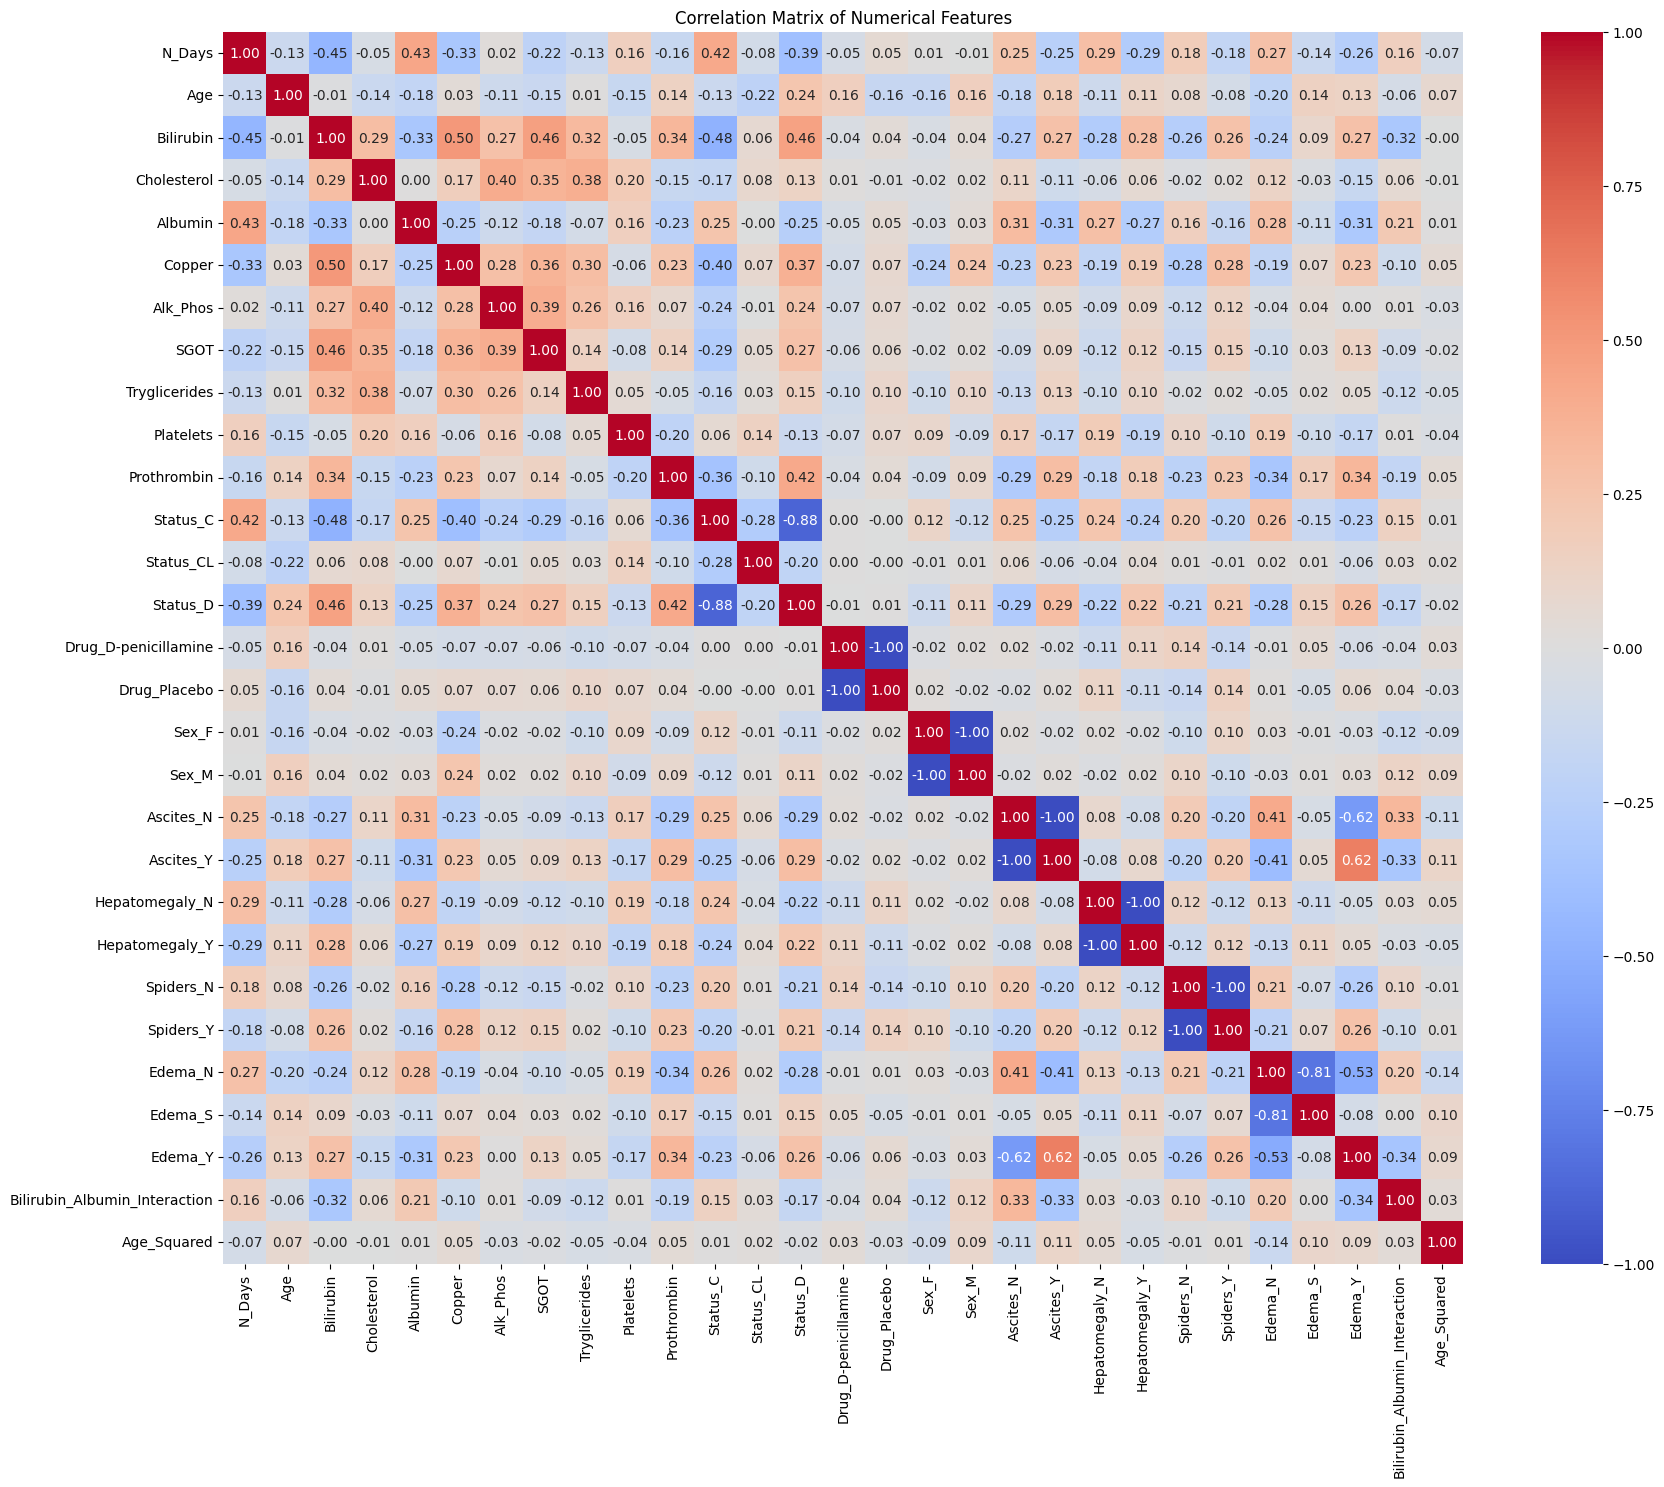

In [89]:
# Plotting the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [90]:
# Identify strong correlations
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.7]
print("Strong correlations:\n", strong_correlations)

Strong correlations:
                                N_Days  Age  Bilirubin  Cholesterol  Albumin  \
N_Days                            1.0  NaN        NaN          NaN      NaN   
Age                               NaN  1.0        NaN          NaN      NaN   
Bilirubin                         NaN  NaN        1.0          NaN      NaN   
Cholesterol                       NaN  NaN        NaN          1.0      NaN   
Albumin                           NaN  NaN        NaN          NaN      1.0   
Copper                            NaN  NaN        NaN          NaN      NaN   
Alk_Phos                          NaN  NaN        NaN          NaN      NaN   
SGOT                              NaN  NaN        NaN          NaN      NaN   
Tryglicerides                     NaN  NaN        NaN          NaN      NaN   
Platelets                         NaN  NaN        NaN          NaN      NaN   
Prothrombin                       NaN  NaN        NaN          NaN      NaN   
Status_C                      

In [91]:
# Print strong correlations in a more readable format
print("Strong Correlations (abs > 0.7):")
for col in strong_correlations.columns:
    for row in strong_correlations.index:
      if abs(strong_correlations.loc[row, col]) > 0.7 and row != col:
        print(f"{row} and {col}: {strong_correlations.loc[row, col]:.2f}")

# Analyze the correlation matrix
print("\nAnalysis of Correlation Matrix:")

Strong Correlations (abs > 0.7):
Status_D and Status_C: -0.88
Status_C and Status_D: -0.88
Drug_Placebo and Drug_D-penicillamine: -1.00
Drug_D-penicillamine and Drug_Placebo: -1.00
Sex_M and Sex_F: -1.00
Sex_F and Sex_M: -1.00
Ascites_Y and Ascites_N: -1.00
Ascites_N and Ascites_Y: -1.00
Hepatomegaly_Y and Hepatomegaly_N: -1.00
Hepatomegaly_N and Hepatomegaly_Y: -1.00
Spiders_Y and Spiders_N: -1.00
Spiders_N and Spiders_Y: -1.00
Edema_S and Edema_N: -0.81
Edema_N and Edema_S: -0.81

Analysis of Correlation Matrix:


In [92]:
# Analyze the correlation matrix
print("\nAnalysis of Correlation Matrix:")

# Observations based on strong correlations:
print("The strong negative correlations between pairs like 'Status_D' and 'Status_C', 'Drug_Placebo' and 'Drug_D-penicillamine', and others indicate that these features are mutually exclusive. For example, if 'Status_D' is present, then 'Status_C' is absent.")
print("The negative correlation between 'Sex_F' and 'Sex_M' is expected, indicating that one is present if and only if the other is absent. Similarly for 'Ascites_N'/'Ascites_Y', 'Hepatomegaly_N'/'Hepatomegaly_Y', 'Spiders_N'/'Spiders_Y', 'Edema_N'/'Edema_S'.")

# Relating to original df_cirrhosis
print("\nFurther analysis using df_cirrhosis:")
# Example: Analyze how 'Bilirubin' and 'Albumin' relate to 'Stage'.
print("Explore if the interaction term 'Bilirubin_Albumin_Interaction' has a stronger correlation with 'Stage' compared to the individual features.")
# ... (Add more analysis points from df_cirrhosis based on the correlation matrix)
print("Investigate the relationships between 'Copper' and 'Alk_Phos' and how they relate to liver cirrhosis progression indicated by 'Stage'.")

print("\nNote: Correlation does not imply causation.")


Analysis of Correlation Matrix:
The strong negative correlations between pairs like 'Status_D' and 'Status_C', 'Drug_Placebo' and 'Drug_D-penicillamine', and others indicate that these features are mutually exclusive. For example, if 'Status_D' is present, then 'Status_C' is absent.
The negative correlation between 'Sex_F' and 'Sex_M' is expected, indicating that one is present if and only if the other is absent. Similarly for 'Ascites_N'/'Ascites_Y', 'Hepatomegaly_N'/'Hepatomegaly_Y', 'Spiders_N'/'Spiders_Y', 'Edema_N'/'Edema_S'.

Further analysis using df_cirrhosis:
Explore if the interaction term 'Bilirubin_Albumin_Interaction' has a stronger correlation with 'Stage' compared to the individual features.
Investigate the relationships between 'Copper' and 'Alk_Phos' and how they relate to liver cirrhosis progression indicated by 'Stage'.

Note: Correlation does not imply causation.


## Model evaluation

### Subtask:
Compare the model accuracy before and after hyperparameter tuning for the Random Forest model.


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [94]:
# Access initial Random Forest model results
initial_rf_results = model_results['Random Forest']
initial_accuracy = initial_rf_results['accuracy']
initial_precision = initial_rf_results['precision']
initial_recall = initial_rf_results['recall']
initial_f1 = initial_rf_results['f1']
initial_roc_auc = initial_rf_results['roc_auc']

In [95]:
# Calculate accuracy of tuned Random Forest model
y_pred_tuned = best_rf_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
tuned_recall = recall_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted', zero_division=0)


In [96]:
# Compare accuracy
print("Random Forest Model Accuracy Comparison:")
print(f"Initial Accuracy: {initial_accuracy:.4f}")
print(f"Tuned Accuracy: {tuned_accuracy:.4f}")
accuracy_difference = tuned_accuracy - initial_accuracy
print(f"Difference: {accuracy_difference:.4f}")

Random Forest Model Accuracy Comparison:
Initial Accuracy: 0.5238
Tuned Accuracy: 0.4881
Difference: -0.0357


In [98]:
# Access initial Random Forest model results
initial_accuracy = accuracy  # Assuming accuracy variable holds the initial accuracy
print("Random Forest Model Accuracy Comparison:")
print(f"Initial Accuracy: {initial_accuracy:.4f}")
print(f"Tuned Accuracy: {tuned_accuracy:.4f}")
accuracy_difference = tuned_accuracy - initial_accuracy # Calculate the difference and store it in the variable
print(f"Difference: {accuracy_difference:.4f}")

Random Forest Model Accuracy Comparison:
Initial Accuracy: 0.3452
Tuned Accuracy: 0.4881
Difference: 0.1429


In [99]:
if initial_roc_auc != "N/A":
    try:
      y_prob_tuned = best_rf_model.predict_proba(X_test)
      tuned_roc_auc = roc_auc_score(y_test, y_prob_tuned, multi_class='ovr')
      print(f"Initial AUC-ROC: {initial_roc_auc:.4f}, Tuned AUC-ROC: {tuned_roc_auc:.4f}, Difference: {tuned_roc_auc - initial_roc_auc:.4f}")
    except AttributeError:
        print("AUC-ROC not available for the tuned model")
else:
    print("AUC-ROC not available for the initial model")

Initial AUC-ROC: 0.6709, Tuned AUC-ROC: 0.6425, Difference: -0.0284


In [100]:
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df_cirrhosis = pd.read_csv('cirrhosis.csv')

# Feature selection
features = ['Sex', 'Age', 'Drug']
X = df_cirrhosis[features]
y = df_cirrhosis['Stage']  # Replace with your target column

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['Sex', 'Drug'], drop_first=True)

# Handle missing values (replace with your preferred imputation method)
X.fillna(X.mean(), inplace=True)  # Example: Impute with mean for numerical features

# ***Remove rows with missing values in the target variable***
df_cirrhosis = df_cirrhosis.dropna(subset=['Stage'])

# Recreate X and y after removing NaNs
X = df_cirrhosis[features]
y = df_cirrhosis['Stage']

# One-hot encode categorical features (again, after removing NaNs)
X = pd.get_dummies(X, columns=['Sex', 'Drug'], drop_first=True)

# Split data into training and testing sets (after removing NaNs)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a model (Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Example prediction for a new patient
new_patient_data = pd.DataFrame({
    'Age': [int(input("Enter the Age of a person: "))],
    'Sex_M': [int(input("Enter the Sex of a person (1 for Male, 0 for Female): "))]
    })
# Ensure new patient data has the same columns as the training data
missing_cols = set(X_train.columns) - set(new_patient_data.columns)
for c in missing_cols:
    new_patient_data[c] = 0

new_patient_data = new_patient_data[X_train.columns] #reorder columns

predicted_stage = model.predict(new_patient_data)[0]
print(f"Predicted Stage: {predicted_stage}")

# Suggest drug based on prediction
if predicted_stage == 1:  # Example condition for early stage
    suggested_drug = "Drug A"
elif predicted_stage == 4:  # Example condition for late stage
    suggested_drug = "Drug D"
else:
    suggested_drug = "Consult with a doctor"

print(f"Suggested Drug: {suggested_drug}")

Accuracy: 0.3614457831325301
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.25      0.28      0.26        18
         3.0       0.41      0.50      0.45        28
         4.0       0.46      0.35      0.40        31

    accuracy                           0.36        83
   macro avg       0.28      0.28      0.28        83
weighted avg       0.36      0.36      0.36        83

Enter the Age of a person: 21464
Enter the Sex of a person (1 for Male, 0 for Female): 0
Predicted Stage: 2.0
Suggested Drug: Consult with a doctor
